# Lab 3

__Team Members__
- Name 1: Jorge Olmos
- Name 2: Bosang Yun
- Name 3: Yucheol Shin
- Name 4: Siu Wai Yeung

# Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
    - [Part 1](#data-understanding-part1)
    - [Part 2](#data-understanding-part2)
* [Modeling Evaluation](#deployment)
    - [Train and Adjust Parameters](#train-adjust)
    - [Evaluate and Compare](#evaluate-compare)
    - [Visualize Resutls](#visualize-results)
    - [Summarize Rammifications](#summarize-rammifications)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# 1. Business Understanding  <a id='business-understanding'/>

## `Purpose of Data Selected`

We selected the hotel data set to investigate the associations for bookings that are canceled, the associations of booking city hotel vs a resort hotel, as well as what are the associations for an expensive vs inexpensive booking. To do so we will be exeucting an association rule learning alogirthm that could provide insights on what variables make it more likely for cancellaiton, which variables make it more likely for a customer to book a hotel in the city vs a resort hotel, and which variables make a booking more or less expensive for customer.

## `How will you measure the effectiveness of a good algorithm? `

We will be measuring the effectiveness of a rule by inspecting the confidence of each rule, or how likely is the the left hand side of the rule produced our desired right hand side. 

## `Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?`

Association rules is not a predictive rather inferential. There are not traditional validation techinques we can follow for the inferential analysis. We rather gather enough data and focus on the rules with **high support and high lift** to present most reasonal association.

# 2. Data Understanding <a id = '#data-understanding'/>

## Part 1 <a id ='#data-understanding-part1'/>

### `Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>





#### `Loading Library`

In [9]:
library(dplyr)
library(arules)
library(arulesViz)
library(RColorBrewer)
library(ggplot2)

#### `Loading Data`

In [10]:
bookings=read.csv("https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv")
# bookings

### `Verify data quality`

#### `Missing values?`
Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__”, "__country__", "__meal__", “__company__” attributes as they do not provide any valuable information for analysis
3. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* children- 4
* market_segment - 2
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent, country, meal, and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. For missing values in __children, market_segment, and distribution_channel__, we removed those rows as the number of missing values are very small.
Data cleaning for the above attributes will be followed. 

In [11]:
bookings <- subset(bookings, select = -c(agent, country,company,meal,arrival_date_week_number, reservation_status_date))

#### `Outliers`
##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed

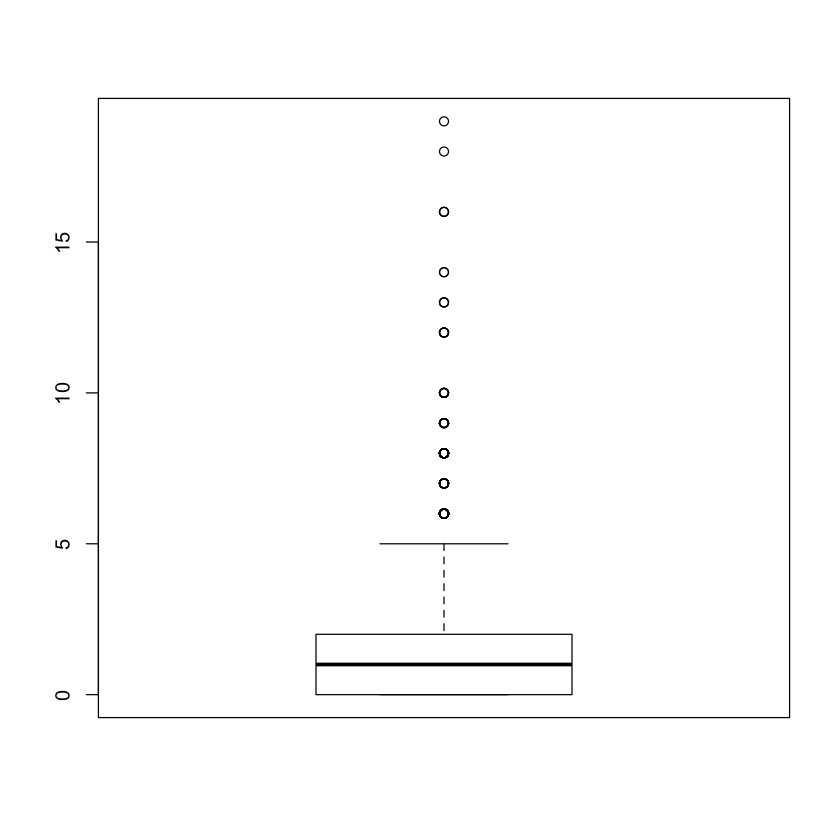

[1] 265

[1] 3354

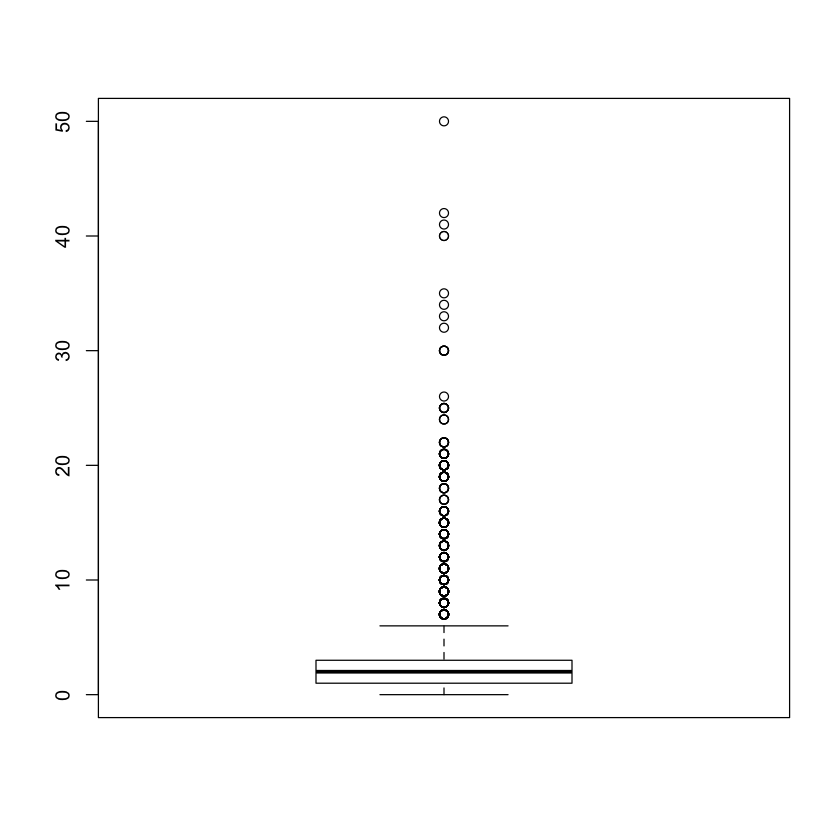

In [12]:
###################### Outliers ###########################
# Boxplot of stays_in_weekend_nights and stays_in_week_nights
boxplot(bookings$stays_in_weekend_nights) # Very skewed
boxplot(bookings$stays_in_week_nights)  # Very skewed


# Identifying outliers in stays_in_weekend_nights, stays_in_week 
outliers1 <- boxplot(bookings$stays_in_weekend_nights, plot=FALSE)$out
outliers2 <- boxplot(bookings$stays_in_week_nights, plot=FALSE)$out
outliers3 <- boxplot(bookings$adr, plot=FALSE)$out
outliers4 <- boxplot(bookings$lead_time, plot=FALSE)$out

length(outliers1) # Total of 265 outliers identified
length(outliers2)

bookings<- bookings[-which(bookings$stays_in_weekend_nights %in% outliers1),]
bookings<- bookings[-which(bookings$stays_in_week_nights %in% outliers2),]
bookings<- bookings[-which(bookings$adr %in% outliers3),]
bookings<- bookings[-which(bookings$lead_time %in% outliers4),]

#### `Variable Imputation`

In [13]:
summary(bookings$adr)

#low_bookings <- bookings %>% filter(bookings$adr == "Low")

#head(bookings)
#summ_adr <- summary(bookings$adr)
summ_adr <- quantile(bookings$adr, c(.33, .66))
#summ_lead_time <- summary(bookings$lead_time)
summ_lead_time <- quantile(bookings$lead_time, c(.33, .66))

#summ_stays_in_weeks <- summary(bookings$stays_in_weeks)
#summ_adr
adr_breaks = c(-Inf, summ_adr['33%'],summ_adr['66%'],Inf )
lead_time_breaks = c(-Inf,summ_lead_time['33%'], summ_lead_time['66%'], Inf)
#stays_in_weaks_breaks = c(-Inf,summ_stays_in_weeks['1st Qu.'], summ_stays_in_weeks['3rd Qu.'], Inf)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -6.38   69.50   93.60   97.64  122.50  211.03 

In [14]:
################### Changing binary values to Yes and No #####################
bookings$is_canceled <- ifelse(bookings$is_canceled == 1, "Yes", "No")
bookings$is_repeated_guest <- ifelse(bookings$is_repeated_guest == 1, "Yes", "No")


bookings <- discretizeDF(bookings, methods = list(
lead_time = list(method = "Fixed", breaks = lead_time_breaks, 
   labels = c("Low", "Medium", "High")),
 adr = list(method = "Fixed", breaks = adr_breaks , 
   labels = c("Low", "Medium", "High")),
 stays_in_week_nights = list(method = "frequency", breaks = 3, 
   labels = c("Low", "Medium", "High"))
 ),
 default = list(method = "none")
 )



bookings$monthNum <- match(bookings$arrival_date_month, month.name)
bookings$fullDate <- as.Date(with(bookings, paste(arrival_date_year, monthNum, arrival_date_day_of_month,sep="-")), "%Y-%m-%d")
bookings$weekday <- weekdays(bookings$fullDate)
bookings <- subset(bookings, select=-c(monthNum,fullDate,arrival_date_day_of_month))


# Assigning seasons to arrival_date_month
bookings <- bookings %>% 
mutate(arrival_date_month = case_when(
    arrival_date_month %in% c('December','January', 'February') ~ 'Winter',
    arrival_date_month %in% c('March','April', 'May') ~ 'Spring',
    arrival_date_month %in% c( 'June','July','August') ~ 'Summer',
    arrival_date_month %in% c('September','October', 'November') ~ 'Fall'
    ))

summary(bookings$lead_time)

bookings<-subset(bookings, select=-(arrival_date_year))

# Factoring the dataframe
index <- 1:ncol(bookings)
bookings[ , index] <- lapply(bookings[ , index], as.factor)
str(bookings)

trans <- as(bookings, "transactions") # now the transaction data is ready for analysis
trans

Low Medium   High 
 35542  36541  37342

'data.frame':	109425 obs. of  25 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 2 2 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 1 1 1 1 1 1 2 2 1 ...
 $ arrival_date_month            : Factor w/ 4 levels "Fall","Spring",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ stays_in_weekend_nights       : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_week_nights          : Factor w/ 3 levels "Low","Medium",..: 1 1 1 2 2 2 2 3 3 3 ...
 $ adults                        : Factor w/ 14 levels "0","1","2","3",..: 3 2 2 3 3 3 3 3 3 3 ...
 $ children                      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ babies                        : Factor w/ 5 levels "0","1","2","9",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ market_segment                : Factor w/ 8 levels "Aviation","Complementa

transactions in sparse format with
 109425 transactions (rows) and
 339 items (columns)

## Part 2 <a id ='#data-understanding-part2'/>

#### `Most Frequent Items(Top 30)`

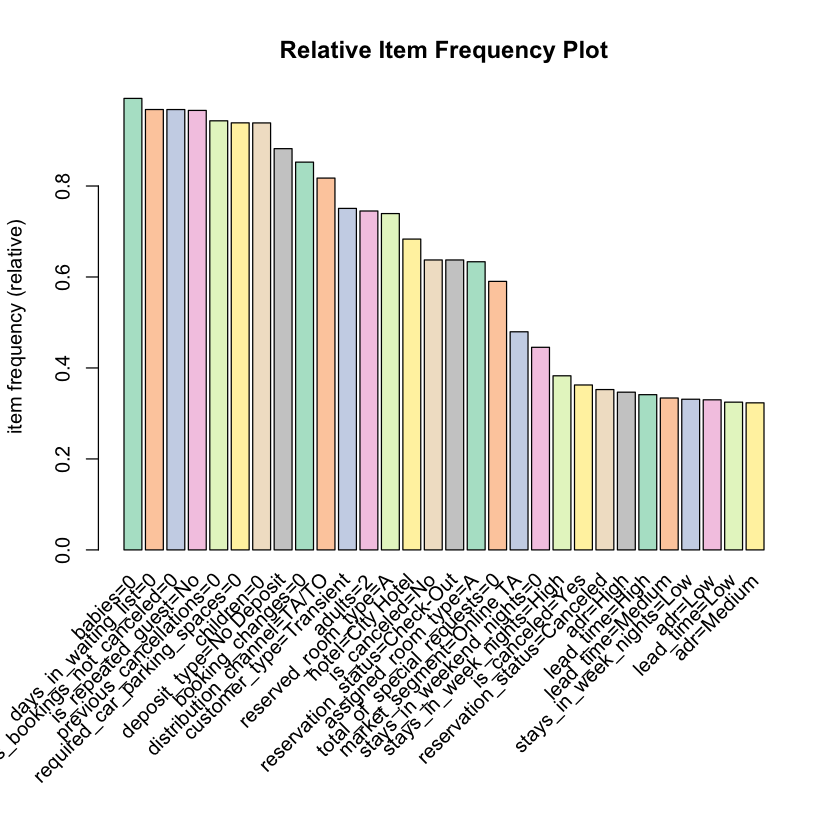

In [15]:
itemFrequencyPlot(trans,topN=30,type="relative",col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")

#### `Market Segment`

Market segmentation involves analyzing the target markets for the hotel industry and segmenting them based on the pricing sensitivity and booking behaviors. Understanding market segment is very important part of understanding customer needs and it leads to better insights and predictibility of the model.

Online tour agents heavily accounted for the market segment. They were more than double the number of offline TA/TO, which was the second largest market segment. We will delve into this attribute in relation to other key attributes(For example, it is assumed that online/offline Tour agents have better ADR than other market segments due to their ability to book in bulk.)

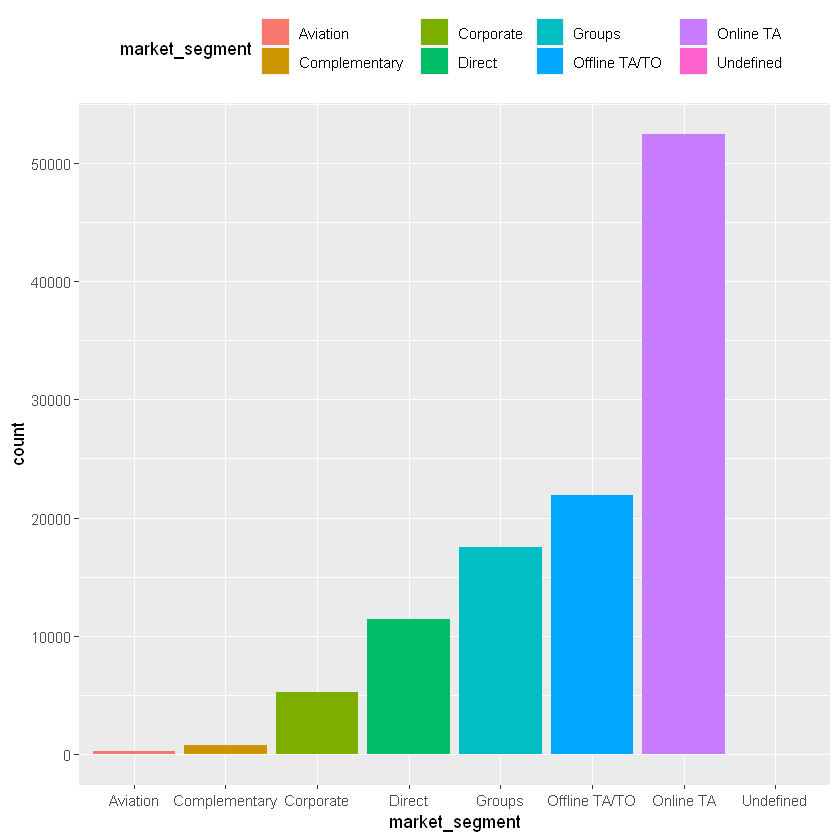

In [50]:
g <- ggplot(bookings, aes(market_segment))
g + geom_bar(aes(fill=market_segment)) + theme(legend.position = "top")

#### `Customer Type`

Customer Type is type of booking with four categories.
 - Contract: when the booking has an allotment or other type of contract associated to it
 - Group: when the booking is associated to a group
 - Transient: when the booking is not part of a group or contract, and is not associated to other transient booking
 - Transient-party: when the booking is transient, but is associated to at least other transient booking

We focused on the customer type in order to understand which attributes of the hotel and its booking characteristics related to the each customer. Transient party guests usually are short-term stay with less than 10 nights and are the most dominant customer type. It is a bit surprisng to see the group and contract category being not as outstanding given that the dominant market segment for tour agents.

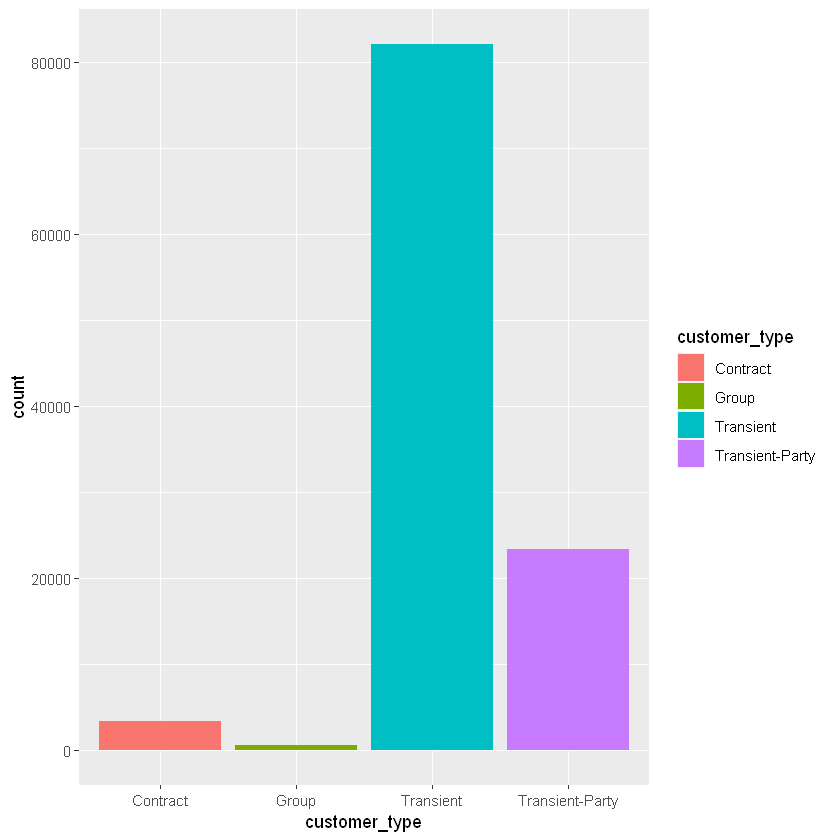

In [51]:
g <- ggplot(bookings, aes(customer_type))
g + geom_bar(aes(fill=customer_type))

#### `Seasonality`

Since Apriori needs a categorical data and we need seasonal information rather than time series data for understanding the association, we have converted our month data into the seasonality. For every quarter, we divided up into the season. During the peak seaon, summer, there are much greater numbers of high adr. And during off-season, winter, there are more number of low adr.

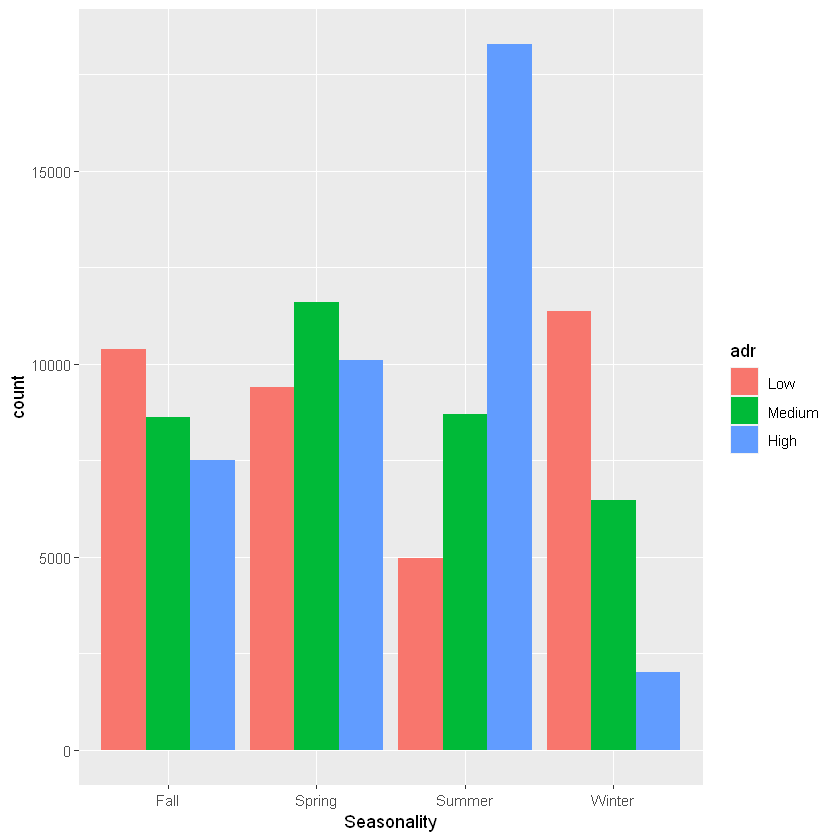

In [52]:
g <- ggplot(bookings, aes(arrival_date_month))
g + geom_bar(aes(fill=adr), position = "dodge") + xlab("Seasonality")

#### `Day of the Week`

Since we need a categorical variable for the apriori, we converted the arrival_date_of_month into the day of the week. With weekday conversion, we can look for the association of weekday to the target variables, such as ADR or Cancellation. From the below bar chart, there are more number of booking during Thursday and Friday. Both numbers of medium and high adr booking are lowest at Thursday, and they gradually increases untill Friday then it decreases untill Sunday.

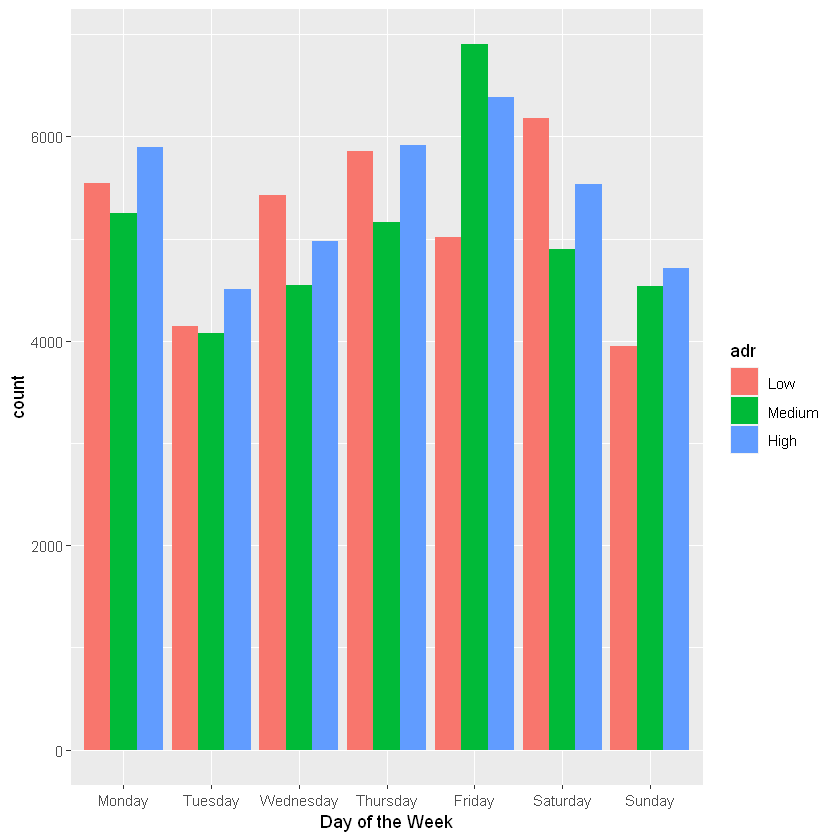

In [53]:
level_order <- c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
g <- ggplot(bookings, aes(factor(weekday, level = level_order)))
g + geom_bar(aes(fill=adr), position = "dodge") + xlab("Day of the Week")

#### `ADR and Cancellation`

Two of another key features is ADR and is_cancellation which we can look into the assocation to these two targets from other attributes. We can see there are more number of non cancellation than the cancelled booking. Also we can see that there are more number of Low ADR on non-canceled booking and there are more number of medium and high ADR on canceled booking.

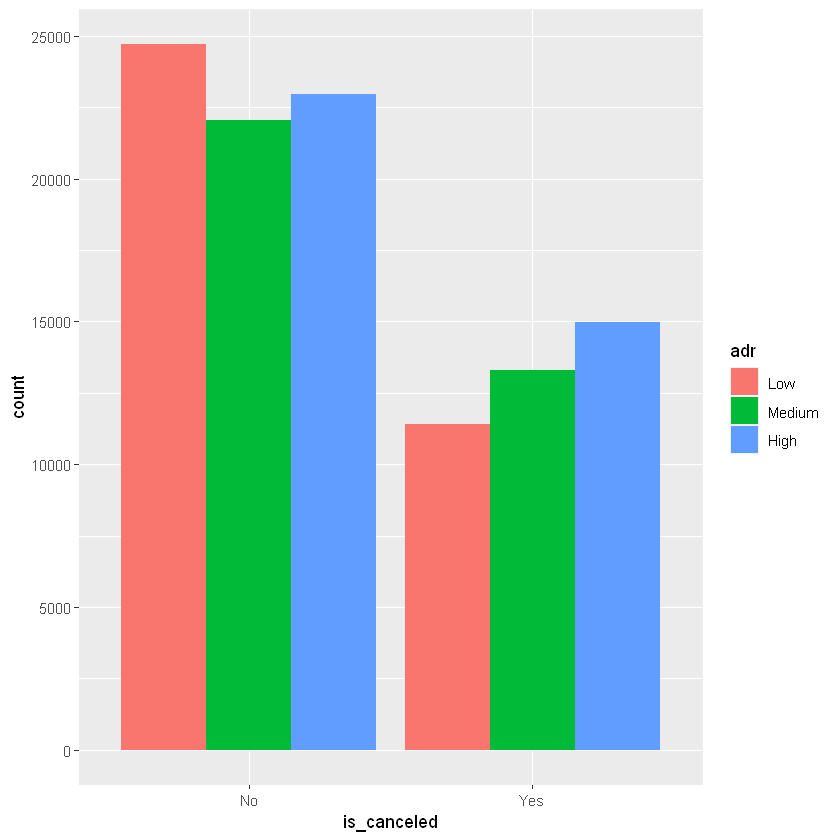

In [54]:
g <- ggplot(bookings, aes(is_canceled))
g + geom_bar(aes(fill = adr), position='dodge')

# 3. Modeling and Evaluation

## Train and adjust parameters

## Rules for LHS (All the variables) vs RHS(ADR)

In [55]:
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"),default="lhs"))
summary(rules)
rules_lift <- sort(rules, by="lift")
rules_pruned_adr <- rules_lift[!is.redundant(rules_lift, measure="lift")]
#rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.95]

#inspect(sort(rules, by = 'lift')[1:10])

#length(rules_pruned)
#inspect(rules_pruned, by="lift")



set of 3263 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5 
   1   23  314 2925 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   5.000   4.889   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005008   Min.   :0.9000   Min.   :0.005045   Min.   :2.596  
 1st Qu.:0.006150   1st Qu.:0.9207   1st Qu.:0.006562   1st Qu.:2.675  
 Median :0.008371   Median :0.9386   Median :0.008992   Median :2.748  
 Mean   :0.011213   Mean   :0.9442   Mean   :0.011934   Mean   :2.763  
 3rd Qu.:0.013498   3rd Qu.:0.9689   3rd Qu.:0.014457   3rd Qu.:2.817  
 Max.   :0.043308   Max.   :1.0000   Max.   :0.047640   Max.   :3.031  
     count     
 Min.   : 548  
 1st Qu.: 673  
 Median : 916  
 Mean   :1227  
 3rd Qu.:1477  
 Max.   :4739  

mining info:
  data ntransactions support confidence
 trans        109425   0.005        0.9

## Rules for LHS(All the variables) vs RHS(is_canceled)

In [56]:
rules <- apriori(trans,parameter=list(minlen=2, maxlen=5,support=.005, confidence=.95), control = list(verbose=F),appearance = list(rhs=c("is_canceled=No","is_canceled=Yes"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
rules_pruned_cancel <- rules_lift[!is.redundant(rules_lift, measure="lift")]
#length(rules_pruned)
#inspect(rules_pruned,by="lift")

set of 61961 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5 
    5   290  5550 56116 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   5.000   4.901   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005008   Min.   :0.9500   Min.   :0.005008   Min.   :1.490  
 1st Qu.:0.008499   1st Qu.:1.0000   1st Qu.:0.008535   1st Qu.:1.569  
 Median :0.016367   Median :1.0000   Median :0.016404   Median :1.569  
 Mean   :0.036638   Mean   :0.9974   Mean   :0.036681   Mean   :2.120  
 3rd Qu.:0.038922   3rd Qu.:1.0000   3rd Qu.:0.038986   3rd Qu.:2.758  
 Max.   :0.637423   Max.   :1.0000   Max.   :0.637423   Max.   :2.758  
     count      
 Min.   :  548  
 1st Qu.:  930  
 Median : 1791  
 Mean   : 4009  
 3rd Qu.: 4259  
 Max.   :69750  

mining info:
  data ntransactions support confidence
 trans        109425   0.005       0.95

## Evaluate and Compare

#### `ADR Evaluation`

#### `Cancellation Evaluation`

## Visualize Results

#### `ADR Plots`

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


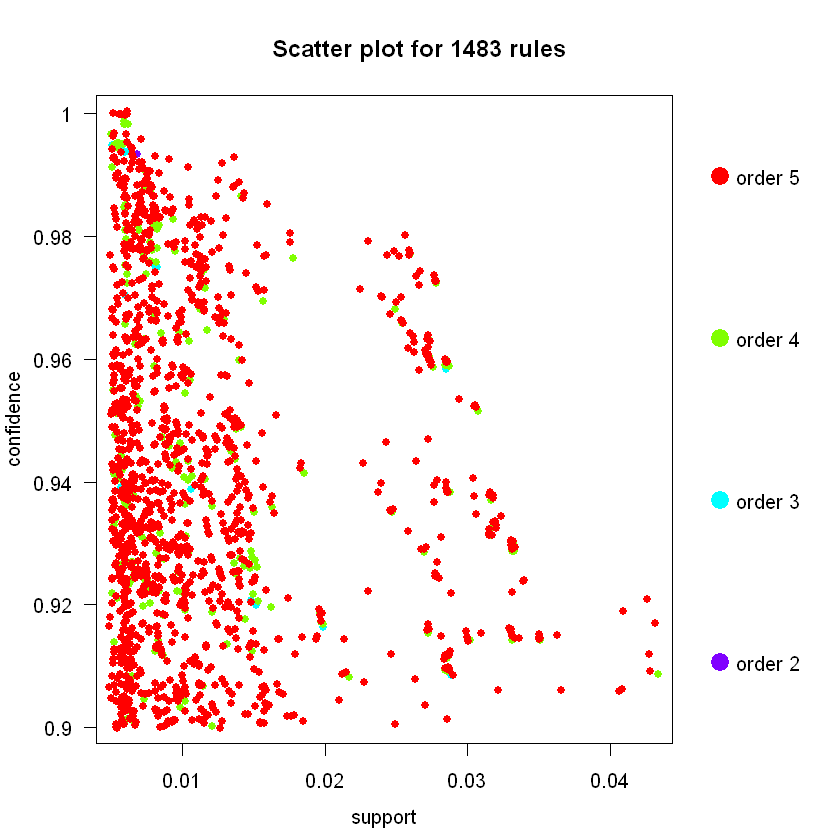

In [57]:
# The two-key plot uses support and confidence on x and y-axis respectively.
# It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned_adr, method="two-key plot")

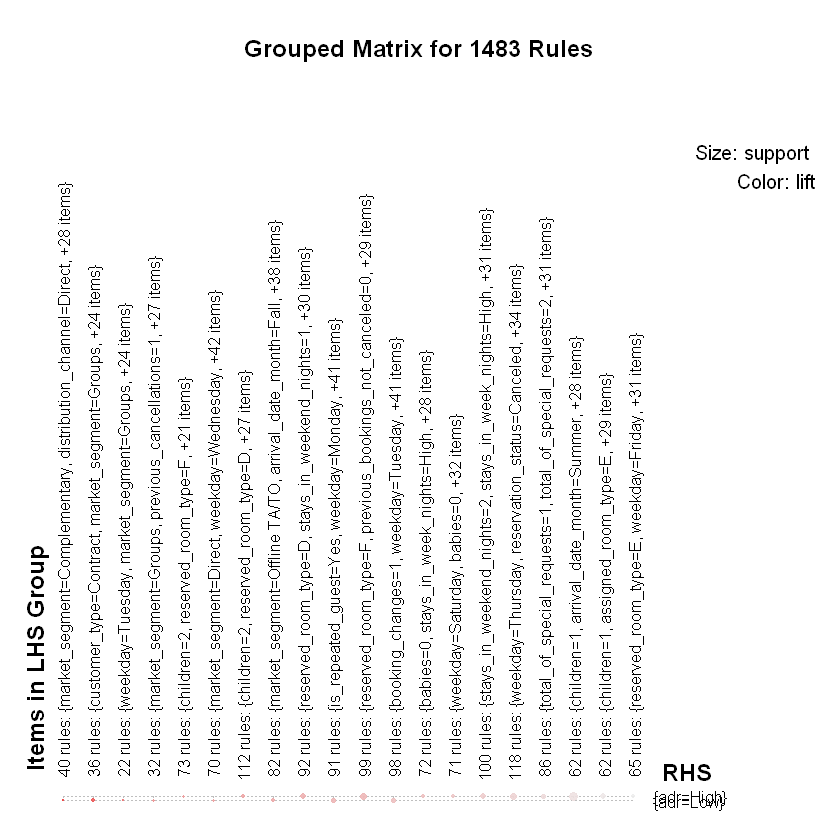

In [58]:
# a great plot
plot(rules_pruned_adr, method="grouped")

IGRAPH 3d6918e DN-- 24 46 -- 
+ attr: name (v/c), label (v/c), support (v/n), confidence (v/n),
| coverage (v/n), lift (v/n), count (v/n), order (v/n)
+ edges from 3d6918e (vertex names):
 [1] 47 ->assoc1  59 ->assoc1  312->assoc1  7  ->assoc2  47 ->assoc2 
 [6] 312->assoc2  330->assoc2  4  ->assoc3  7  ->assoc3  47 ->assoc3 
[11] 312->assoc3  1  ->assoc4  7  ->assoc4  47 ->assoc4  312->assoc4 
[16] 2  ->assoc5  11 ->assoc5  45 ->assoc5  324->assoc5  2  ->assoc6 
[21] 11 ->assoc6  45 ->assoc6  145->assoc6  2  ->assoc7  11 ->assoc7 
[26] 38 ->assoc7  45 ->assoc7  47 ->assoc8  312->assoc8  330->assoc8 
[31] 4  ->assoc9  47 ->assoc9  312->assoc9  1  ->assoc10 47 ->assoc10
+ ... omitted several edges

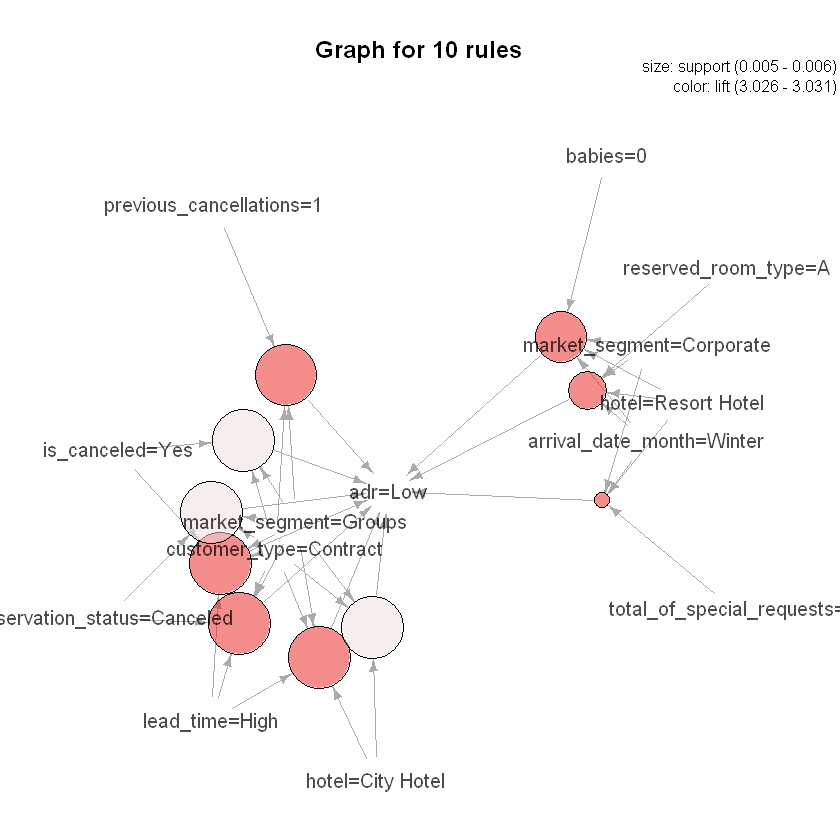

In [59]:
library(htmlwidgets)
library(IRdisplay)
library(plotly)

top10Rules <- head(rules_pruned_adr, n = 10, by = "confidence")
p <- plot(top10Rules, method = "graph")
#html_plot(p,out=paste0("demo",".html"))
#saveWidget(p, 'demo.html', selfcontained=FALSE)
p
#saveAsGraph(head(rules_pruned, n = 100, by = "lift"), file = "rules.graphml")

#### `Cancellation Plots`

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


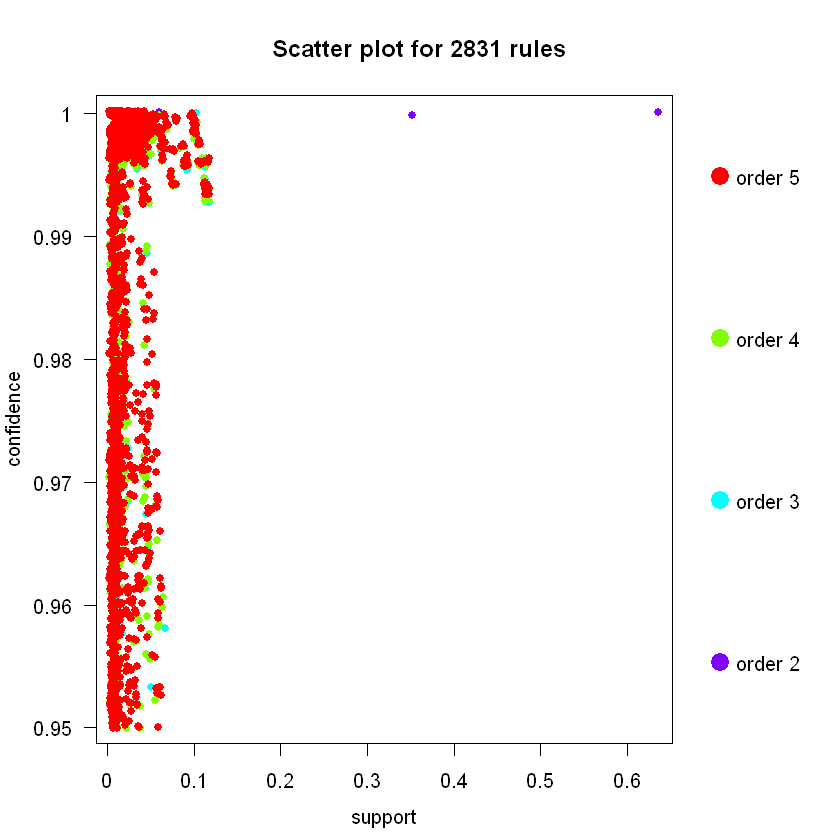

In [60]:
# The two-key plot uses support and confidence on x and y-axis respectively.
# It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned_cancel, method="two-key plot")

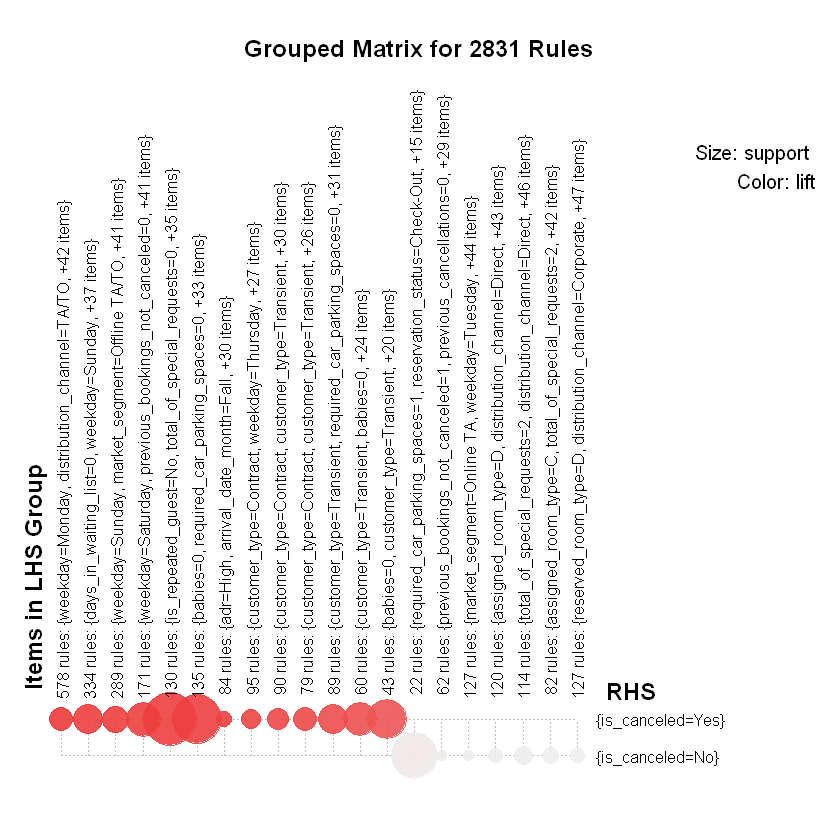

In [61]:
# a great plot
plot(rules_pruned_cancel, method="grouped")

IGRAPH 3df0d80 DN-- 24 33 -- 
+ attr: name (v/c), label (v/c), support (v/n), confidence (v/n),
| coverage (v/n), lift (v/n), count (v/n), order (v/n)
+ edges from 3df0d80 (vertex names):
 [1] 332   ->assoc1  330   ->assoc2  59    ->assoc3  312   ->assoc3 
 [5] 59    ->assoc4  187   ->assoc4  187   ->assoc5  314   ->assoc5 
 [9] 1     ->assoc6  47    ->assoc6  312   ->assoc6  47    ->assoc7 
[13] 59    ->assoc7  339   ->assoc7  54    ->assoc8  59    ->assoc8 
[17] 335   ->assoc8  47    ->assoc9  59    ->assoc9  334   ->assoc9 
[21] 7     ->assoc10 59    ->assoc10 334   ->assoc10 assoc1->4      
[25] assoc2->4       assoc3->4       assoc4->4       assoc5->4      
+ ... omitted several edges

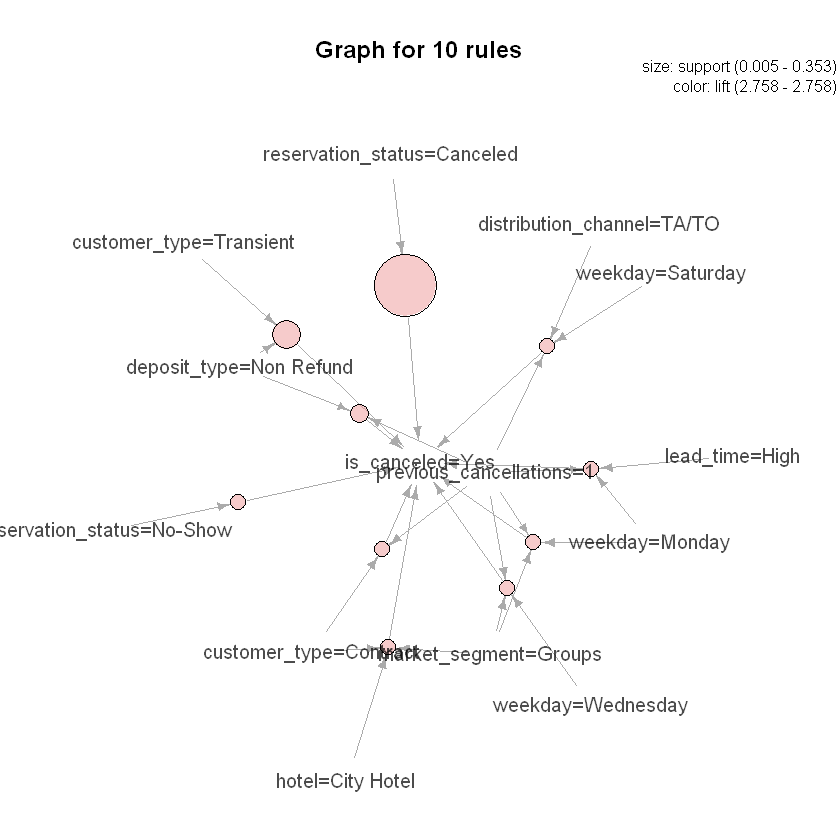

In [62]:
top10Rules <- head(rules_pruned_cancel, n = 10, by = "confidence")
p <- plot(top10Rules, method = "graph")
#html_plot(p,out=paste0("demo",".html"))
#saveWidget(p, 'demo.html', selfcontained=FALSE)
p
#saveAsGraph(head(rules_pruned, n = 100, by = "lift"), file = "rules.graphml")

## Summarize the Ramifications

# 4. Deployment

## Rules for LHS(All the variables) vs RHS(Hotel - Resort)

set of 2297 rules

rule length distribution (lhs + rhs):sizes
   4    5 
 382 1915 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.834   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005007   Min.   :0.9001   Min.   :0.005076   Min.   :2.791  
 1st Qu.:0.005809   1st Qu.:0.9160   1st Qu.:0.006145   1st Qu.:2.840  
 Median :0.007058   Median :0.9300   Median :0.007480   Median :2.884  
 Mean   :0.007901   Mean   :0.9389   Mean   :0.008449   Mean   :2.911  
 3rd Qu.:0.009109   3rd Qu.:0.9592   3rd Qu.:0.009764   3rd Qu.:2.974  
 Max.   :0.018029   Max.   :1.0000   Max.   :0.019365   Max.   :3.100  
     count       
 Min.   : 581.0  
 1st Qu.: 674.0  
 Median : 819.0  
 Mean   : 916.8  
 3rd Qu.:1057.0  
 Max.   :2092.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

set of 186 rules

rule length distribution (lhs + rhs):sizes
  4   5 
112  74 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.398   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005024   Min.   :0.9681   Min.   :0.005085   Min.   :3.002  
 1st Qu.:0.005541   1st Qu.:0.9785   1st Qu.:0.005632   1st Qu.:3.034  
 Median :0.006252   Median :0.9871   Median :0.006360   Median :3.060  
 Mean   :0.006307   Mean   :0.9855   Mean   :0.006402   Mean   :3.056  
 3rd Qu.:0.006935   3rd Qu.:0.9918   3rd Qu.:0.007006   3rd Qu.:3.075  
 Max.   :0.009239   Max.   :1.0000   Max.   :0.009532   Max.   :3.100  
     count       
 Min.   : 583.0  
 1st Qu.: 643.0  
 Median : 725.5  
 Mean   : 731.8  
 3rd Qu.: 804.8  
 Max.   :1072.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


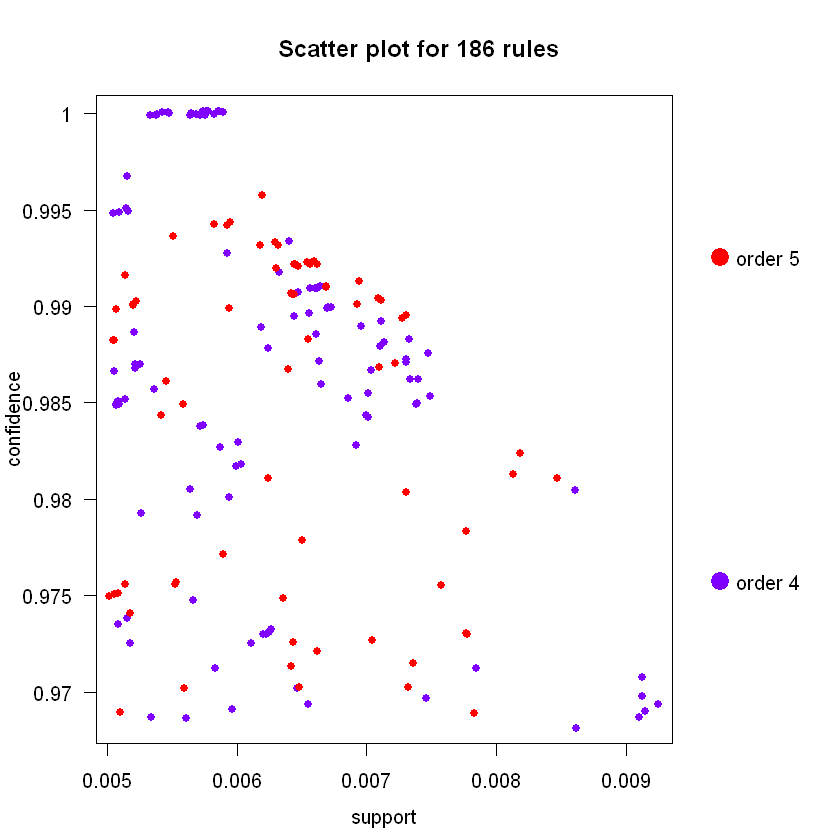

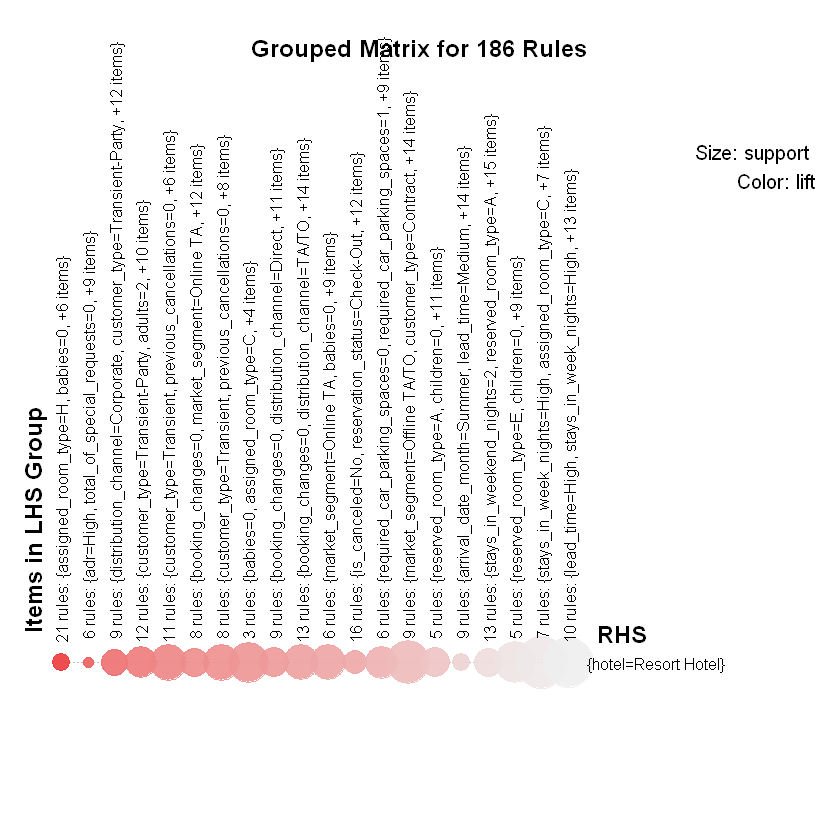

In [17]:
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3.0]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
#plot(rules_pruned, method="graph")
#plot(rules_pruned, method="grouped matrix")
#plot(rules_pruned, method="matrix3D")
#plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(Hotel - Resort)


set of 3291 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5 
   4   61  488 2738 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   5.000   4.811   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005016   Min.   :0.9000   Min.   :0.005016   Min.   :3.731  
 1st Qu.:0.005364   1st Qu.:0.9244   1st Qu.:0.005550   1st Qu.:3.832  
 Median :0.006433   Median :0.9558   Median :0.006665   Median :3.962  
 Mean   :0.007190   Mean   :0.9532   Mean   :0.007596   Mean   :3.951  
 3rd Qu.:0.008267   3rd Qu.:0.9836   3rd Qu.:0.008894   3rd Qu.:4.077  
 Max.   :0.017138   Max.   :1.0000   Max.   :0.018996   Max.   :4.145  
     count      
 Min.   :216.0  
 1st Qu.:231.0  
 Median :277.0  
 Mean   :309.6  
 3rd Qu.:356.0  
 Max.   :738.0  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.9

set of 60 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
 3  8 23 26 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     4.0     4.0     4.2     5.0     5.0 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005016   Min.   :0.9772   Min.   :0.005016   Min.   :4.051  
 1st Qu.:0.005335   1st Qu.:0.9804   1st Qu.:0.005428   1st Qu.:4.064  
 Median :0.005817   Median :0.9865   Median :0.005910   Median :4.089  
 Mean   :0.005981   Mean   :0.9866   Mean   :0.006065   Mean   :4.090  
 3rd Qu.:0.006479   3rd Qu.:0.9911   3rd Qu.:0.006578   3rd Qu.:4.108  
 Max.   :0.008244   Max.   :1.0000   Max.   :0.008430   Max.   :4.145  
     count      
 Min.   :216.0  
 1st Qu.:229.8  
 Median :250.5  
 Mean   :257.6  
 3rd Qu.:279.0  
 Max.   :355.0  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.9

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


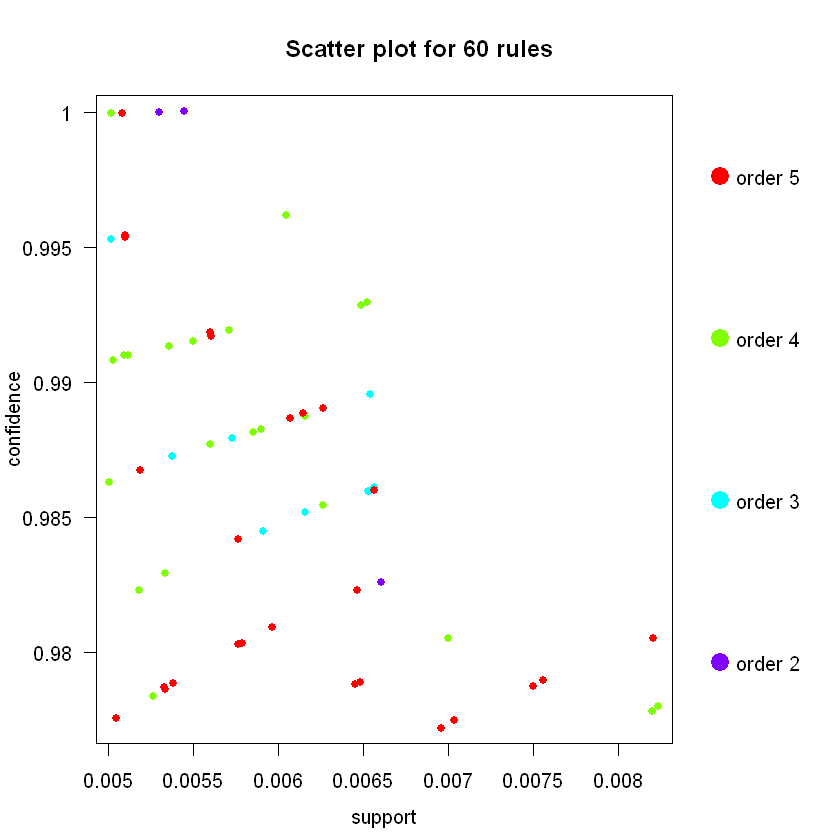

     lhs                                 rhs                      support confidence    coverage     lift count
[1]  {reserved_room_type=H}           => {hotel=Resort Hotel} 0.005294814  1.0000000 0.005294814 4.145264   228
[2]  {assigned_room_type=H}           => {hotel=Resort Hotel} 0.005434152  1.0000000 0.005434152 4.145264   234
[3]  {previous_cancellations=0,                                                                                
      reserved_room_type=C,                                                                                    
      adr=High}                       => {hotel=Resort Hotel} 0.005016140  1.0000000 0.005016140 4.145264   216
[4]  {arrival_date_month=Winter,                                                                               
      stays_in_week_nights=Medium,                                                                             
      market_segment=Groups,                                                                            

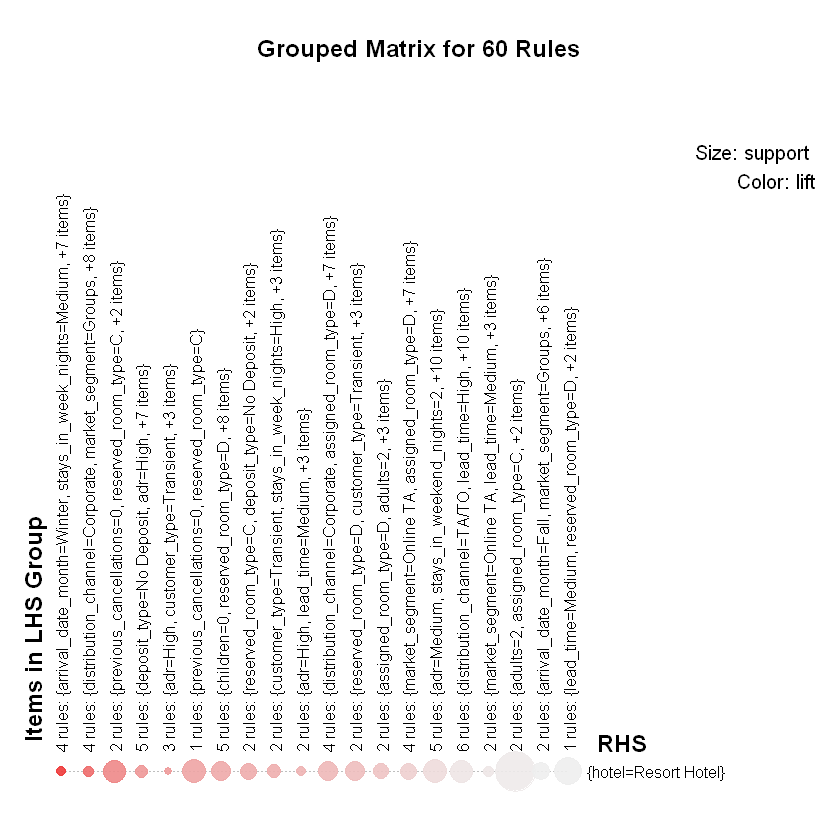

In [18]:
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>4.05 ]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
top10Rules <- head(rules_pruned, n = 10, by = "confidence")
inspect(top10Rules)

## Rules for LHS(All the variables) vs RHS(Hotel - City)

set of 14710 rules

rule length distribution (lhs + rhs):sizes
    4     5 
 1297 13413 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.912   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005007   Min.   :0.9000   Min.   :0.005016   Min.   :1.328  
 1st Qu.:0.007230   1st Qu.:0.9163   1st Qu.:0.007653   1st Qu.:1.353  
 Median :0.011755   Median :0.9355   Median :0.012561   Median :1.381  
 Mean   :0.019810   Mean   :0.9425   Mean   :0.021294   Mean   :1.391  
 3rd Qu.:0.021838   3rd Qu.:0.9655   3rd Qu.:0.023439   3rd Qu.:1.425  
 Max.   :0.317884   Max.   :1.0000   Max.   :0.352632   Max.   :1.476  
     count      
 Min.   :  581  
 1st Qu.:  839  
 Median : 1364  
 Mean   : 2299  
 3rd Qu.: 2534  
 Max.   :36886  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

set of 123 rules

rule length distribution (lhs + rhs):sizes
 4  5 
46 77 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   5.000   4.626   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005110   Min.   :0.9993   Min.   :0.005110   Min.   :1.475  
 1st Qu.:0.006037   1st Qu.:1.0000   1st Qu.:0.006037   1st Qu.:1.476  
 Median :0.007041   Median :1.0000   Median :0.007041   Median :1.476  
 Mean   :0.009105   Mean   :1.0000   Mean   :0.009106   Mean   :1.476  
 3rd Qu.:0.009842   3rd Qu.:1.0000   3rd Qu.:0.009842   3rd Qu.:1.476  
 Max.   :0.034308   Max.   :1.0000   Max.   :0.034317   Max.   :1.476  
     count       
 Min.   : 593.0  
 1st Qu.: 700.5  
 Median : 817.0  
 Mean   :1056.5  
 3rd Qu.:1142.0  
 Max.   :3981.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

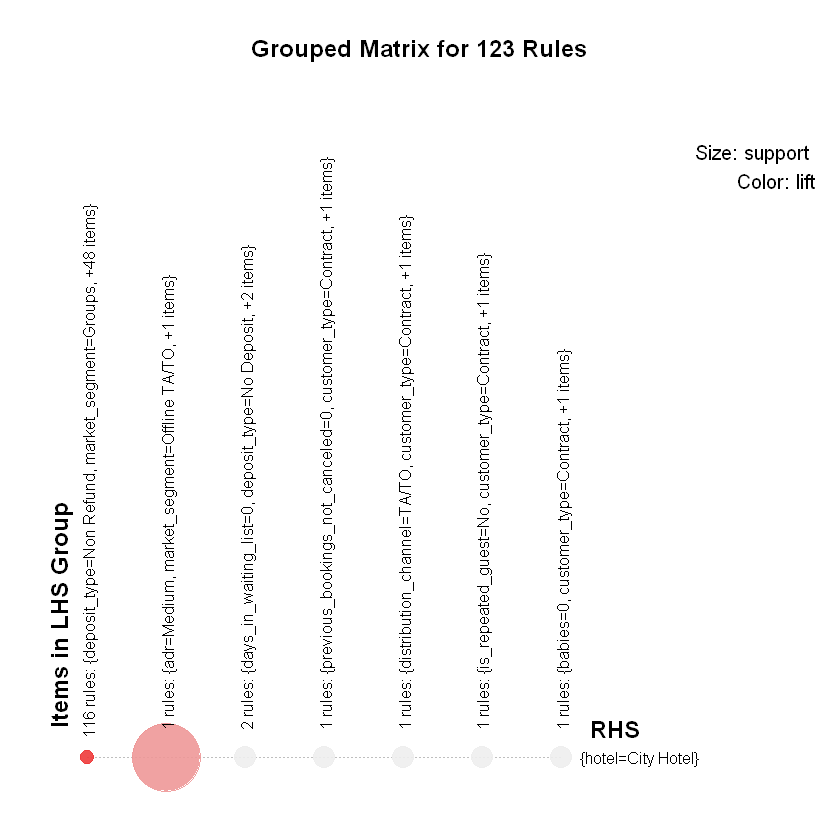

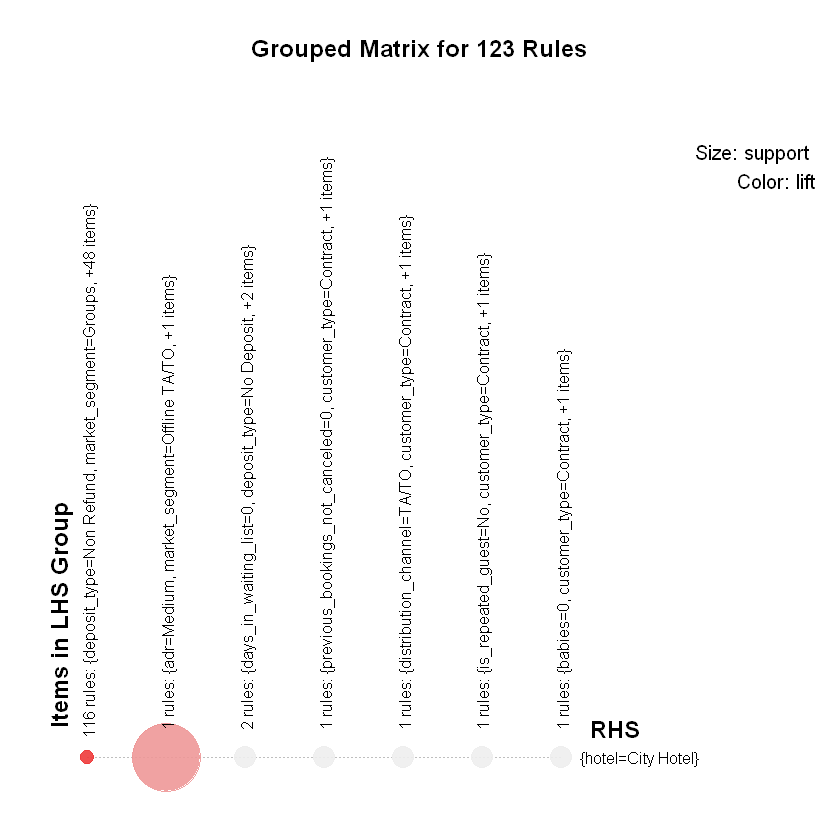

In [19]:
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=City Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>1.475]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots

plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(Hotel - City)

set of 30860 rules

rule length distribution (lhs + rhs):sizes
    4     5 
 2905 27955 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.906   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005012   Min.   :0.9000   Min.   :0.005012   Min.   :2.165  
 1st Qu.:0.009032   1st Qu.:0.9996   1st Qu.:0.009121   1st Qu.:2.405  
 Median :0.018496   Median :1.0000   Median :0.018534   Median :2.406  
 Mean   :0.037936   Mean   :0.9965   Mean   :0.038009   Mean   :2.398  
 3rd Qu.:0.042796   3rd Qu.:1.0000   3rd Qu.:0.042857   3rd Qu.:2.406  
 Max.   :0.404892   Max.   :1.0000   Max.   :0.404892   Max.   :2.406  
     count      
 Min.   :  394  
 1st Qu.:  710  
 Median : 1454  
 Mean   : 2982  
 3rd Qu.: 3364  
 Max.   :31829  

mining info:
         data ntransactions support confidence
 trans_cancel         78611   0.005        0.9

set of 2281 rules

rule length distribution (lhs + rhs):sizes
   4    5 
1954  327 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.143   4.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005012   Min.   :0.9996   Min.   :0.005012   Min.   :2.405  
 1st Qu.:0.008955   1st Qu.:1.0000   1st Qu.:0.008955   1st Qu.:2.406  
 Median :0.022122   Median :1.0000   Median :0.022122   Median :2.406  
 Mean   :0.054219   Mean   :1.0000   Mean   :0.054220   Mean   :2.406  
 3rd Qu.:0.059813   3rd Qu.:1.0000   3rd Qu.:0.059813   3rd Qu.:2.406  
 Max.   :0.404892   Max.   :1.0000   Max.   :0.404892   Max.   :2.406  
     count      
 Min.   :  394  
 1st Qu.:  704  
 Median : 1739  
 Mean   : 4262  
 3rd Qu.: 4702  
 Max.   :31829  

mining info:
         data ntransactions support confidence
 trans_cancel         78611   0.005        0.9

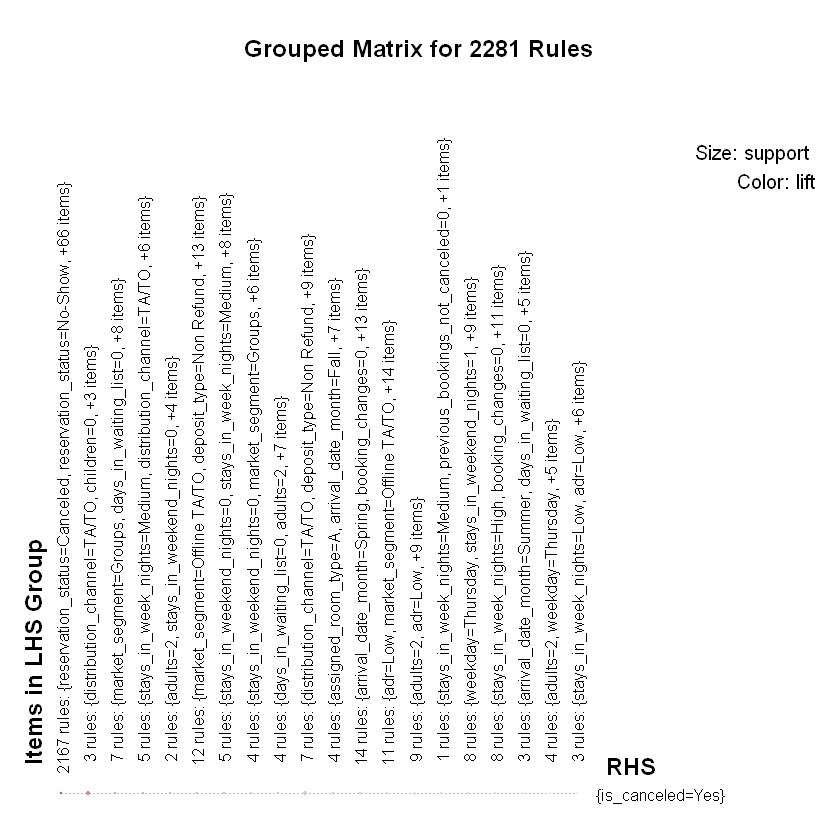

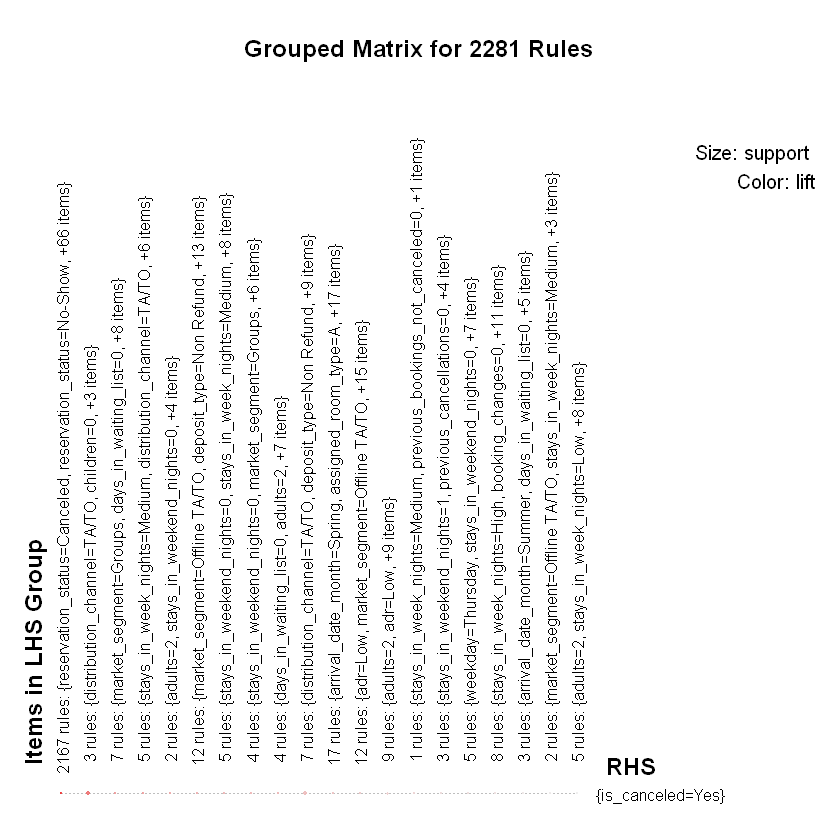

In [20]:
trans_cancel <- as(bookings[bookings$hotel == "City Hotel", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("is_canceled=Yes"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>2.40507]
summary(rules_pruned)

#length(rules_pruned)
#inspect(rules_pruned, by="lift")

# Plots
plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(All the variables) vs RHS(Hotel - Resort)

set of 2297 rules

rule length distribution (lhs + rhs):sizes
   4    5 
 382 1915 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.834   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005007   Min.   :0.9001   Min.   :0.005076   Min.   :2.791  
 1st Qu.:0.005809   1st Qu.:0.9160   1st Qu.:0.006145   1st Qu.:2.840  
 Median :0.007058   Median :0.9300   Median :0.007480   Median :2.884  
 Mean   :0.007901   Mean   :0.9389   Mean   :0.008449   Mean   :2.911  
 3rd Qu.:0.009109   3rd Qu.:0.9592   3rd Qu.:0.009764   3rd Qu.:2.974  
 Max.   :0.018029   Max.   :1.0000   Max.   :0.019365   Max.   :3.100  
     count       
 Min.   : 581.0  
 1st Qu.: 674.0  
 Median : 819.0  
 Mean   : 916.8  
 3rd Qu.:1057.0  
 Max.   :2092.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

set of 186 rules

rule length distribution (lhs + rhs):sizes
  4   5 
112  74 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   4.000   4.398   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005024   Min.   :0.9681   Min.   :0.005085   Min.   :3.002  
 1st Qu.:0.005541   1st Qu.:0.9785   1st Qu.:0.005632   1st Qu.:3.034  
 Median :0.006252   Median :0.9871   Median :0.006360   Median :3.060  
 Mean   :0.006307   Mean   :0.9855   Mean   :0.006402   Mean   :3.056  
 3rd Qu.:0.006935   3rd Qu.:0.9918   3rd Qu.:0.007006   3rd Qu.:3.075  
 Max.   :0.009239   Max.   :1.0000   Max.   :0.009532   Max.   :3.100  
     count       
 Min.   : 583.0  
 1st Qu.: 643.0  
 Median : 725.5  
 Mean   : 731.8  
 3rd Qu.: 804.8  
 Max.   :1072.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.9

[1] 186

      lhs                                   rhs                      support confidence    coverage     lift count
[1]   {assigned_room_type=H,                                                                                      
       deposit_type=No Deposit,                                                                                   
       customer_type=Transient}          => {hotel=Resort Hotel} 0.005472440  1.0000000 0.005472440 3.100494   635
[2]   {previous_cancellations=0,                                                                                  
       assigned_room_type=H,                                                                                      
       customer_type=Transient}          => {hotel=Resort Hotel} 0.005437968  1.0000000 0.005437968 3.100494   631
[3]   {is_repeated_guest=No,                                                                                      
       assigned_room_type=H,                                                    

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


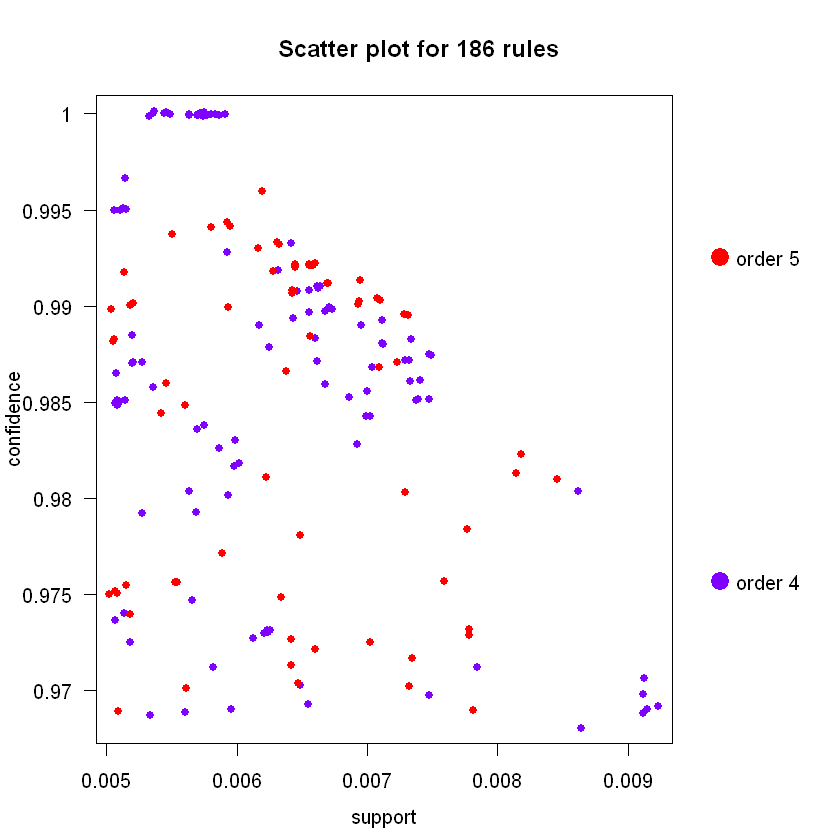

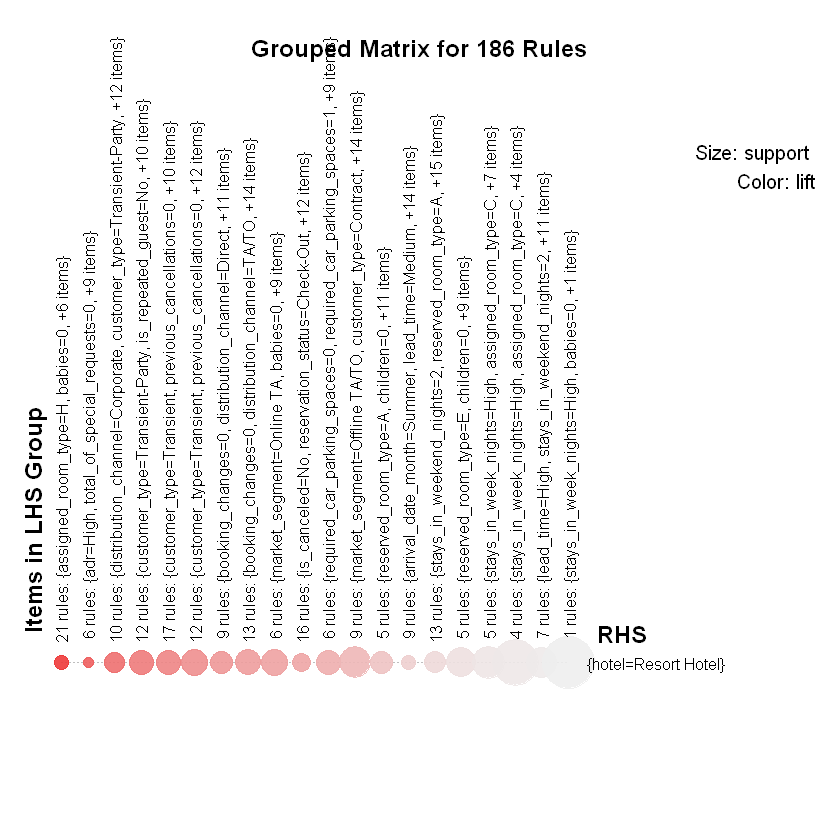

In [21]:
rules <- apriori(trans,parameter=list(minlen=4,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("hotel=Resort Hotel"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3.0]
summary(rules_pruned)

length(rules_pruned)
inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(customer_type - Transient Party(Family, friends))


set of 87257 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5 
   22   670  9275 77290 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   5.000   4.878   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.005016   Min.   :0.9000   Min.   :0.005016   Min.   : 1.091  
 1st Qu.:0.008360   1st Qu.:0.9316   1st Qu.:0.008755   1st Qu.: 1.130  
 Median :0.015304   Median :0.9567   Median :0.016047   Median : 1.160  
 Mean   :0.032231   Mean   :0.9532   Mean   :0.033874   Mean   : 1.190  
 3rd Qu.:0.033813   3rd Qu.:0.9739   3rd Qu.:0.035717   3rd Qu.: 1.181  
 Max.   :0.444764   Max.   :1.0000   Max.   :0.463714   Max.   :33.843  
     count      
 Min.   :  216  
 1st Qu.:  360  
 Median :  659  
 Mean   : 1388  
 3rd Qu.: 1456  
 Max.   :19152  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.9

set of 157 rules

rule length distribution (lhs + rhs):sizes
  3   4   5 
  2  18 137 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.00    5.00    4.86    5.00    5.00 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005063   Min.   :0.9010   Min.   :0.005132   Min.   :6.163  
 1st Qu.:0.006293   1st Qu.:0.9559   1st Qu.:0.006549   1st Qu.:6.539  
 Median :0.008848   Median :0.9856   Median :0.008964   Median :6.742  
 Mean   :0.012987   Mean   :0.9734   Mean   :0.013371   Mean   :6.659  
 3rd Qu.:0.016001   3rd Qu.:0.9958   3rd Qu.:0.016117   3rd Qu.:6.812  
 Max.   :0.061726   Max.   :1.0000   Max.   :0.067788   Max.   :6.841  
     count       
 Min.   : 218.0  
 1st Qu.: 271.0  
 Median : 381.0  
 Mean   : 559.2  
 3rd Qu.: 689.0  
 Max.   :2658.0  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.9

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


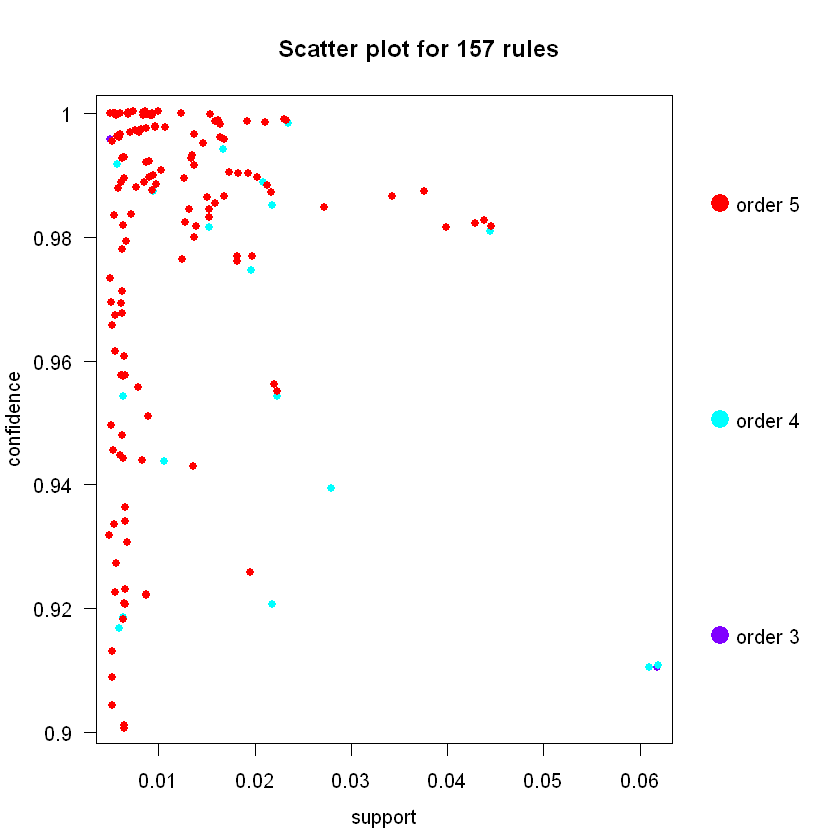

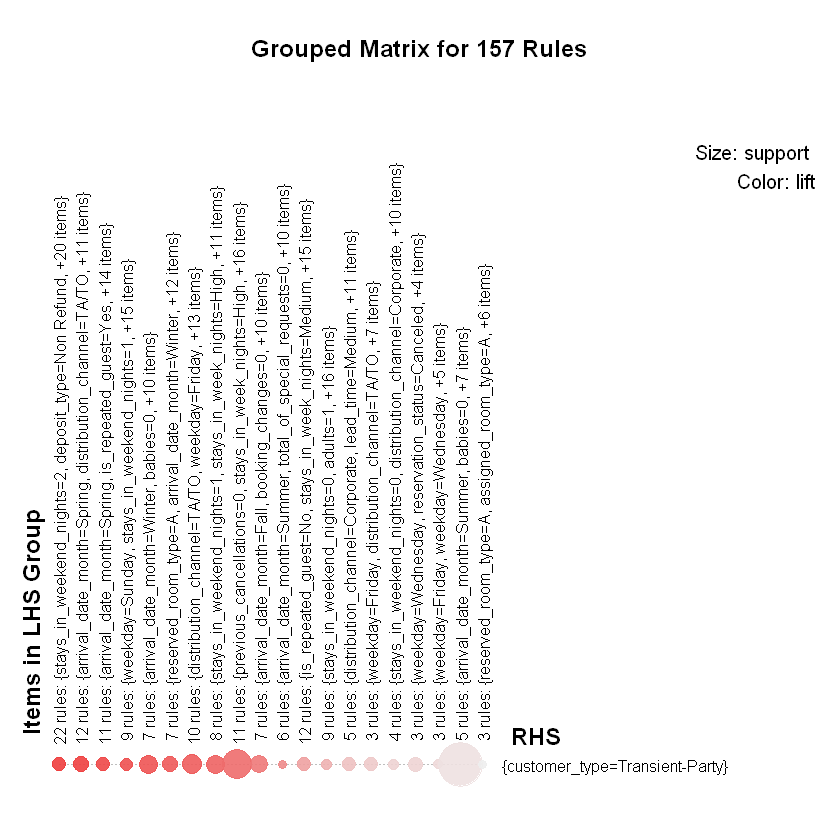

In [22]:
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]
summary(rules_pruned)
#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))

## Rules for LHS(Cancellation related variables) vs RHS(customer_type - Contract (Company or Government))


set of 122 rules

rule length distribution (lhs + rhs):sizes
  4   5 
  5 117 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.959   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.006038   Min.   :0.5000   Min.   :0.006456   Min.   :18.09  
 1st Qu.:0.007896   1st Qu.:0.5138   1st Qu.:0.012656   1st Qu.:18.59  
 Median :0.007896   Median :0.5449   Median :0.014433   Median :19.72  
 Mean   :0.007775   Mean   :0.5623   Mean   :0.013982   Mean   :20.35  
 3rd Qu.:0.007919   3rd Qu.:0.5909   3rd Qu.:0.015350   3rd Qu.:21.38  
 Max.   :0.008337   Max.   :0.9353   Max.   :0.016558   Max.   :33.84  
     count      
 Min.   :260.0  
 1st Qu.:340.0  
 Median :340.0  
 Mean   :334.8  
 3rd Qu.:341.0  
 Max.   :359.0  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.5

set of 87 rules

rule length distribution (lhs + rhs):sizes
 4  5 
 5 82 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.943   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.006038   Min.   :0.5000   Min.   :0.009452   Min.   :18.09  
 1st Qu.:0.007896   1st Qu.:0.5148   1st Qu.:0.012622   1st Qu.:18.63  
 Median :0.007896   Median :0.5457   Median :0.014259   Median :19.75  
 Mean   :0.007756   Mean   :0.5617   Mean   :0.013938   Mean   :20.32  
 3rd Qu.:0.007919   3rd Qu.:0.5956   3rd Qu.:0.015339   3rd Qu.:21.55  
 Max.   :0.008337   Max.   :0.8261   Max.   :0.016558   Max.   :29.89  
     count    
 Min.   :260  
 1st Qu.:340  
 Median :340  
 Mean   :334  
 3rd Qu.:341  
 Max.   :359  

mining info:
         data ntransactions support confidence
 trans_cancel         43061   0.005        0.5

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


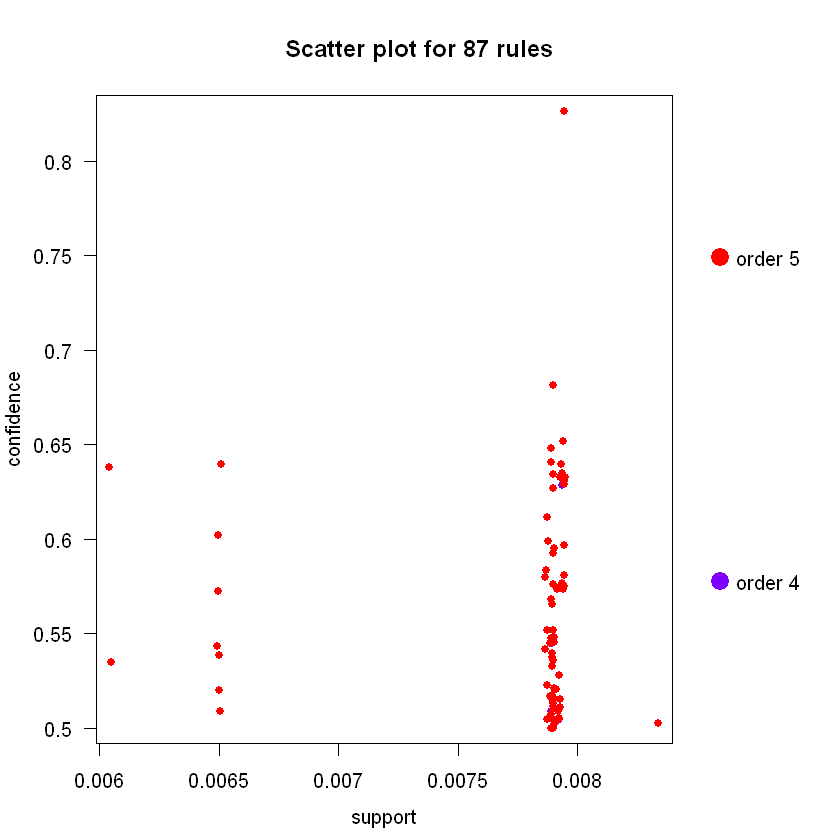

     lhs                              rhs                          support confidence    coverage     lift count
[1]  {stays_in_week_nights=Medium,                                                                              
      is_repeated_guest=No,                                                                                     
      previous_cancellations=1,                                                                                 
      weekday=Thursday}            => {customer_type=Contract} 0.007942221  0.8260870 0.009614268 29.89255   342
[2]  {stays_in_week_nights=Low,                                                                                 
      market_segment=Groups,                                                                                    
      previous_cancellations=1,                                                                                 
      weekday=Monday}              => {customer_type=Contract} 0.007895776  0.6813627 0.01158821

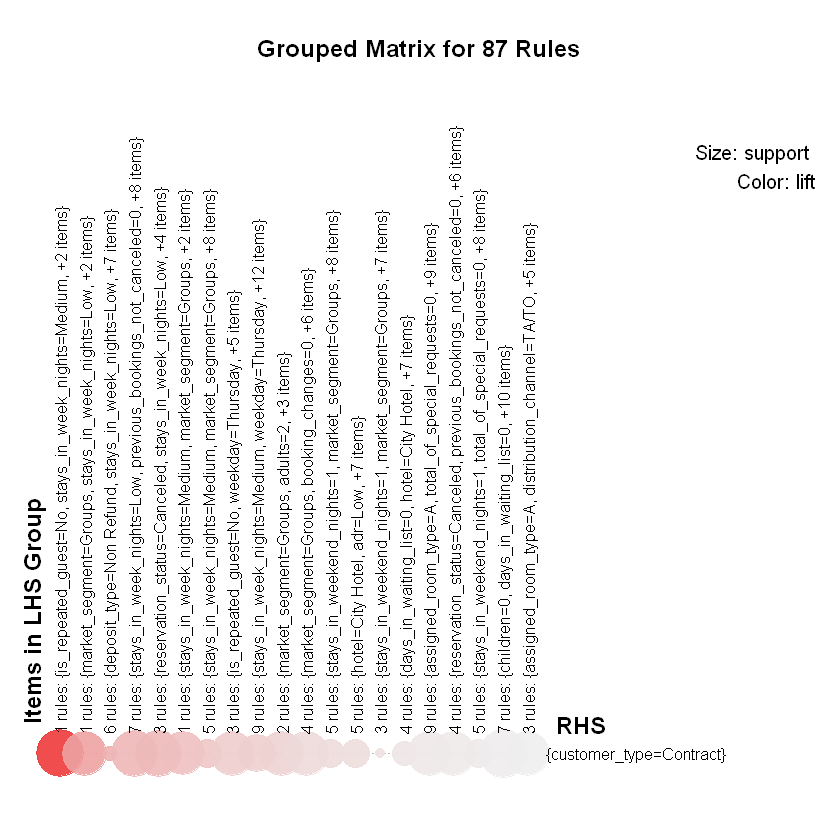

In [23]:
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.5), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]
summary(rules_pruned)
#length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
# plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))

## Rules for LHS(Time related variables) vs RHS(ADR)

set of 2 rules

rule length distribution (lhs + rhs):sizes
3 4 
1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    3.25    3.50    3.50    3.75    4.00 

summary of quality measures:
    support           confidence    coverage             lift       count    
 Min.   :0.001034   Min.   :1    Min.   :0.001034   Min.   :4   Min.   :120  
 1st Qu.:0.001034   1st Qu.:1    1st Qu.:0.001034   1st Qu.:4   1st Qu.:120  
 Median :0.001034   Median :1    Median :0.001034   Median :4   Median :120  
 Mean   :0.001034   Mean   :1    Mean   :0.001034   Mean   :4   Mean   :120  
 3rd Qu.:0.001034   3rd Qu.:1    3rd Qu.:0.001034   3rd Qu.:4   3rd Qu.:120  
 Max.   :0.001034   Max.   :1    Max.   :0.001034   Max.   :4   Max.   :120  

mining info:
  data ntransactions support confidence
 trans        116036   5e-04        0.7

[1] 1

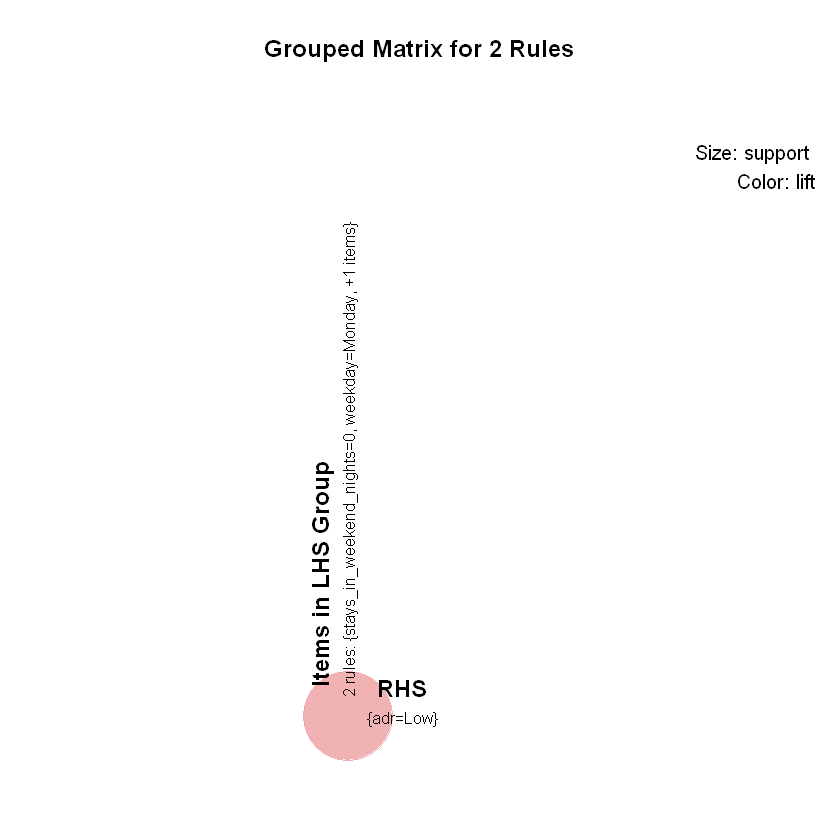

    lhs                                           rhs       support    
[1] {stays_in_weekend_nights=0,weekday=Monday} => {adr=Low} 0.001034162
    confidence coverage    lift     count
[1] 1          0.001034162 4.000138 120  


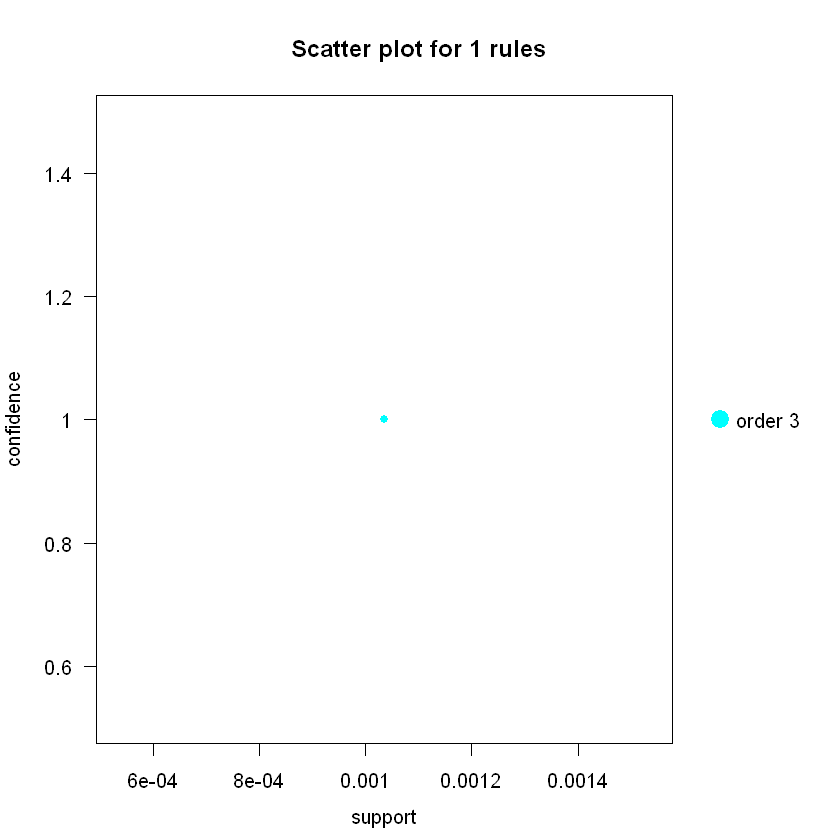

In [24]:
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.0005, confidence=.7), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"), lhs=c("stays_in_week_nights=Low","stays_in_week_nights=Medium","stays_in_week_nights=High", "stays_in_weekend_nights=0","stays_in_weekend_nights=1", "stays_in_weekend_nights=2",  "stays_in_weekend_nights=3","stays_in_weekend_nights=4", "arrival_date_month=Spring","arrival_date_month=Summer","arrival_date_month=Fall","arrival_date_month=Winter","weekday=Monday", "weekday=Tuesday","weekday=Wednesday","weekday=Thursday","weekday=Friday","weekday=Saturday","weekday=Sunday"),default="none"))
                                                                                                              
                                                                                                              
summary(rules)
plot(rules, method="grouped matrix")

rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.95]

 
length(rules_pruned)  
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
#plot(rules_pruned, method="grouped")
# plot(rules_pruned, method="graph")
#plot(rules_pruned, method="grouped matrix")
# plot(rules_pruned, method="matrix3D")
# plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))


## Rules for LHS(Reservation type) vs RHS(ADR)


set of 90 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
 4 18 37 31 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   4.000   4.056   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005110   Min.   :0.7049   Min.   :0.006015   Min.   :1.414  
 1st Qu.:0.006881   1st Qu.:0.7666   1st Qu.:0.009385   1st Qu.:1.603  
 Median :0.011208   Median :0.8172   Median :0.012858   Median :3.011  
 Mean   :0.022557   Mean   :0.8269   Mean   :0.028593   Mean   :2.698  
 3rd Qu.:0.015069   3rd Qu.:0.8672   3rd Qu.:0.017861   3rd Qu.:3.457  
 Max.   :0.156486   Max.   :0.9986   Max.   :0.221983   Max.   :3.994  
     count        
 Min.   :  593.0  
 1st Qu.:  798.5  
 Median : 1300.5  
 Mean   : 2617.4  
 3rd Qu.: 1748.5  
 Max.   :18158.0  

mining info:
  data ntransactions support confidence
 trans        116036   0.005        0.7

[1] 41

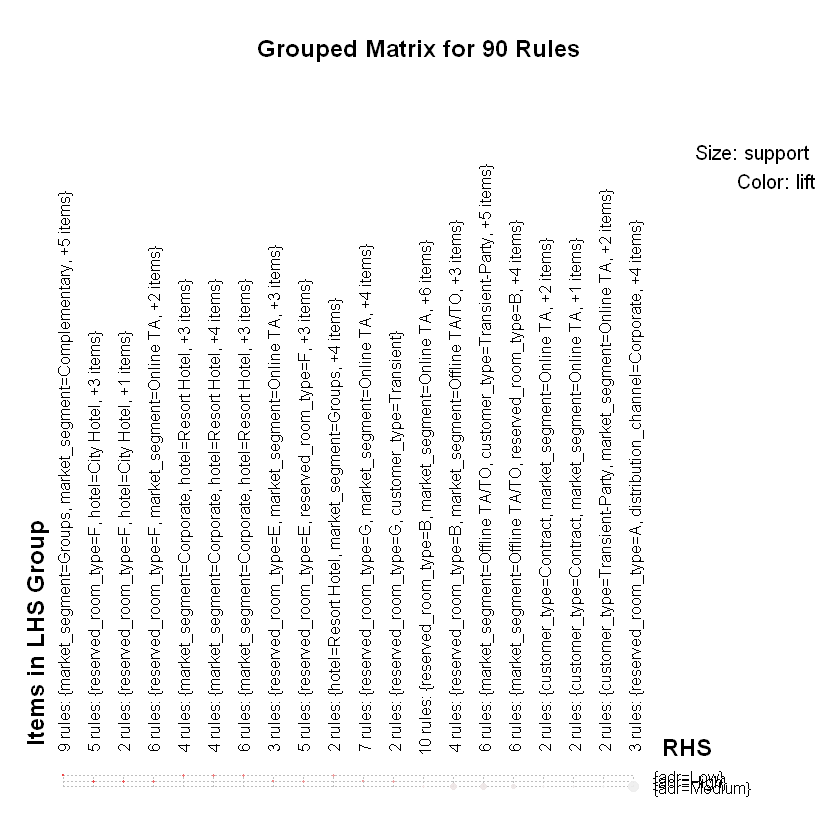

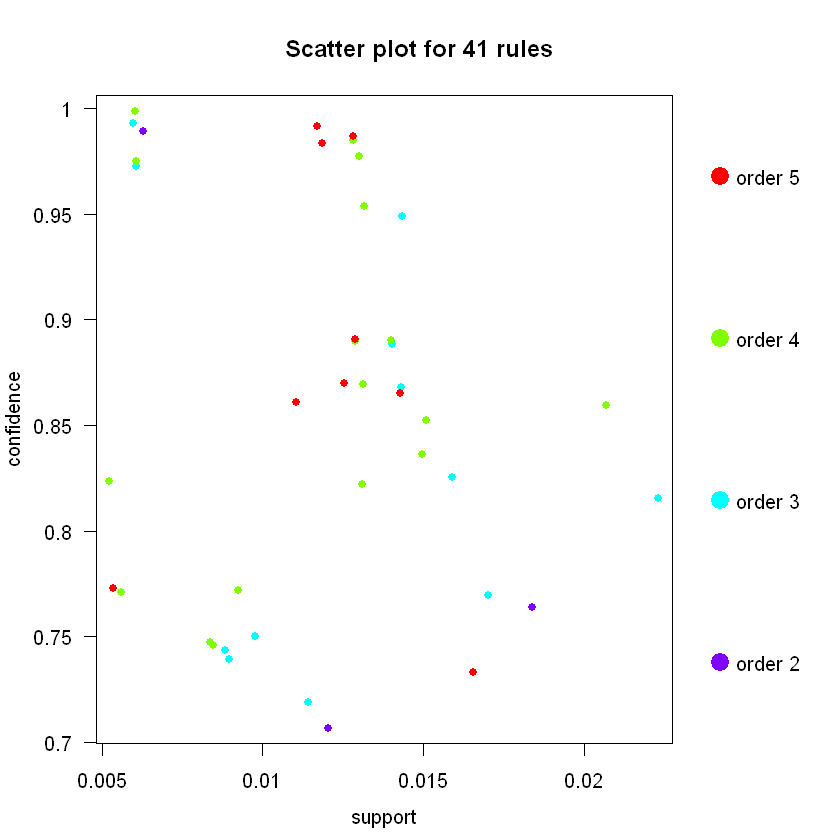

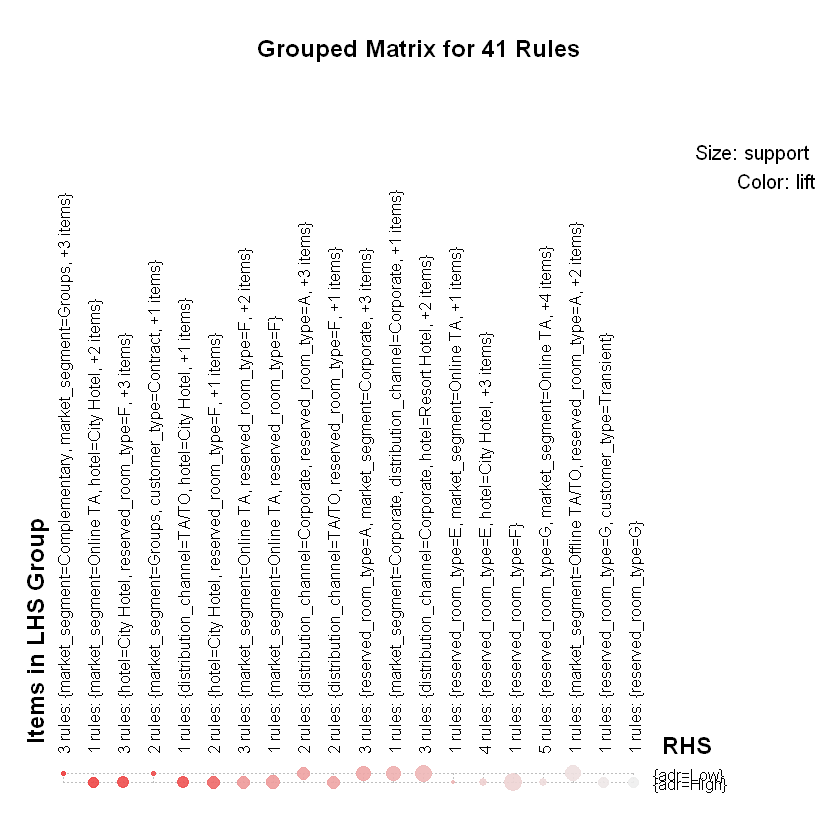

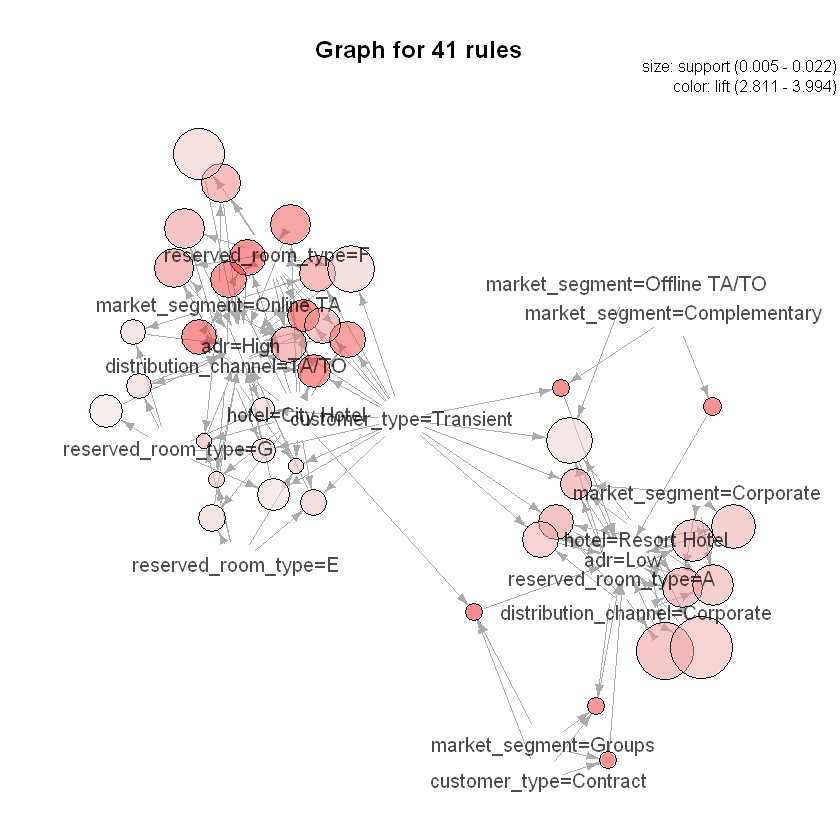

Warning message in plot.rules(rules_pruned, method = "matrix3D"):
"method 'matrix3D' is deprecated use method 'matrix' with engine '3d'"

Itemsets in Antecedent (LHS)
 [1] "{hotel=City Hotel,market_segment=Groups,customer_type=Contract}"                                   
 [2] "{market_segment=Complementary,customer_type=Transient}"                                            
 [3] "{market_segment=Complementary}"                                                                    
 [4] "{hotel=City Hotel,market_segment=Online TA,reserved_room_type=F,customer_type=Transient}"          
 [5] "{hotel=City Hotel,market_segment=Online TA,distribution_channel=TA/TO,reserved_room_type=F}"       
 [6] "{hotel=City Hotel,market_segment=Online TA,reserved_room_type=F}"                                  
 [7] "{hotel=City Hotel,distribution_channel=TA/TO,reserved_room_type=F,customer_type=Transient}"        
 [8] "{market_segment=Groups,reserved_room_type=A,customer_type=Contract}"                               
 [9] "{market_segment=Groups,customer_type=Contract}"                                                    
[10] "{hotel=City

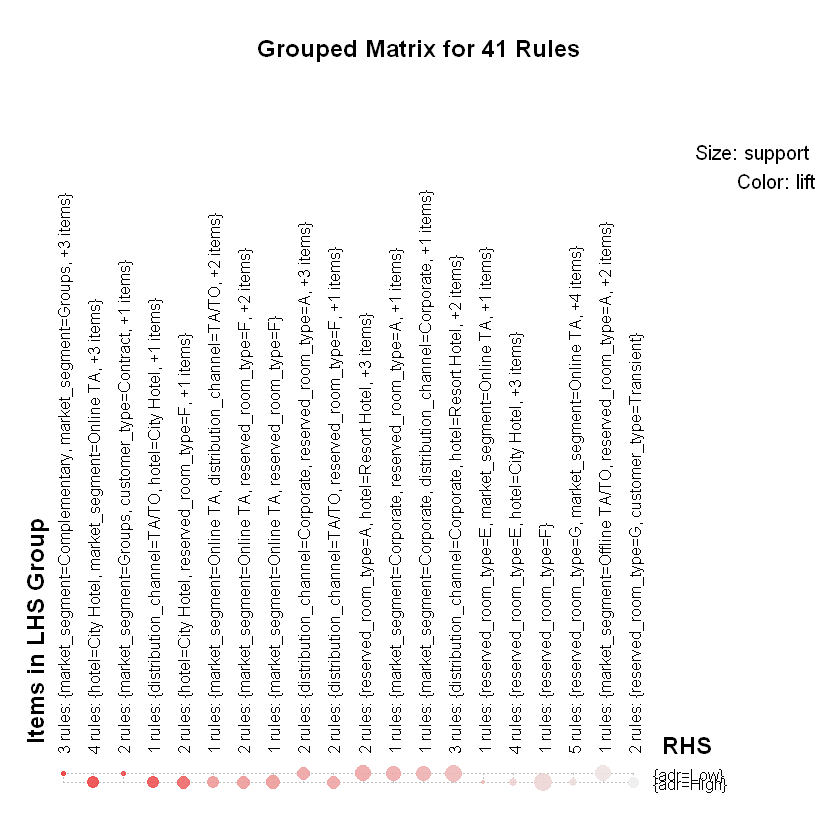

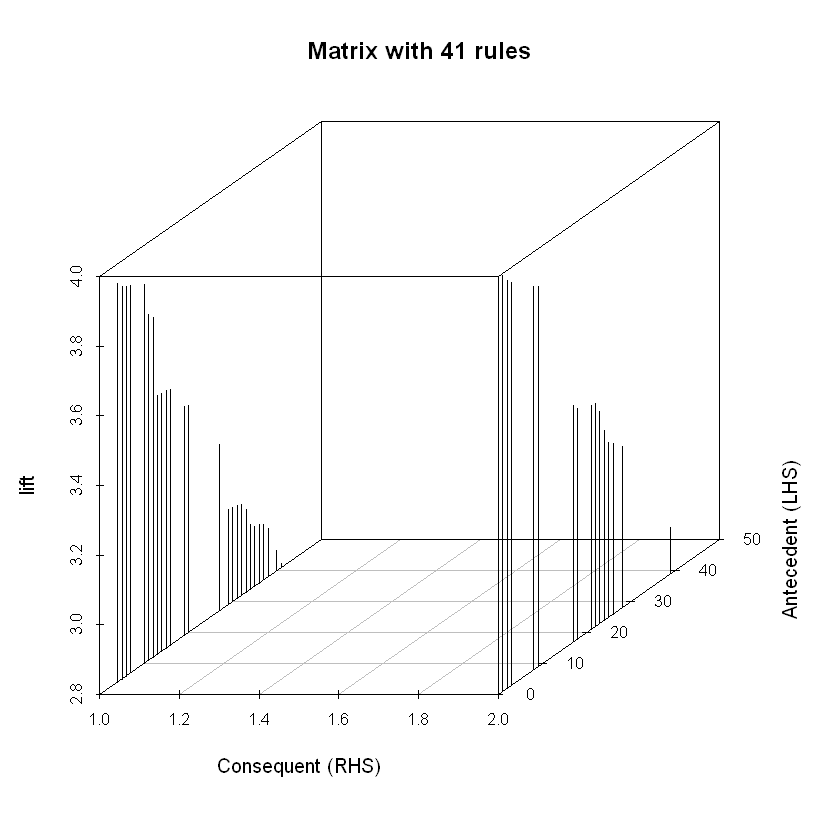

     lhs                               rhs            support confidence    coverage     lift count
[1]  {hotel=City Hotel,                                                                            
      market_segment=Groups,                                                                       
      customer_type=Contract}       => {adr=Low}  0.006032611  0.9985735 0.006041229 3.994432   700
[2]  {market_segment=Complementary,                                                                
      customer_type=Transient}      => {adr=Low}  0.005972284  0.9928367 0.006015375 3.971484   693
[3]  {hotel=City Hotel,                                                                            
      market_segment=Online TA,                                                                    
      reserved_room_type=F,                                                                        
      customer_type=Transient}      => {adr=High} 0.011703265  0.9912409 0.011806681 3.942944  1358


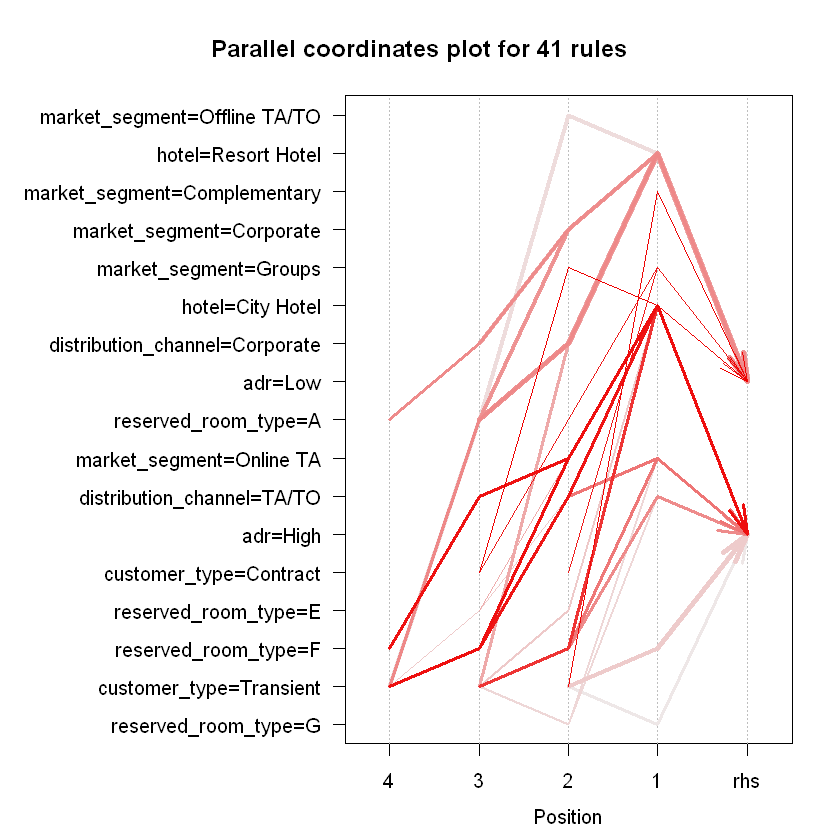

In [25]:
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.7), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"), lhs=c("market_segment=Aviation","market_segment=Complementary", "market_segment=Corporate", "market_segment=Direct", "market_segment=Groups", "market_segment=Offline TA/TO", "market_segment=Online TA", "customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party","reserved_room_type=A","reserved_room_type=B","reserved_room_type=C","reserved_room_type=D","reserved_room_type=E","reserved_room_type=F", "reserved_room_type=G", "reserved_room_type=H", "reserved_room_type=L", "reserved_room_type=P", "distribution_channel=Corporate","distribution_channel=Direct", "distribution_channel=GDS", "distribution_channel=TA/TO", "hotel=Resort Hotel","hotel=City Hotel"),default="none"))
                                                                                                          
                                                                                                           
summary(rules)
plot(rules, method="grouped matrix")

rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.5]

length(rules_pruned)
#inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped")
plot(rules_pruned, method="graph")
plot(rules_pruned, method="grouped matrix")
plot(rules_pruned, method="matrix3D")
plot(rules_pruned, method="paracoord", control = list(reorder = TRUE))
inspect(head(rules_pruned, n = 10, by = "confidence"))

# 5. Exceptional Work